In [16]:
import os
from datetime import datetime
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [17]:
MTEC_YELLOW = '#E6C466'
MTEC_GREY = '#848688'

In [18]:
FILENAME = "./Data Ni Rack.xlsx"
ERROR_PROMPT = "Can't open an excel file"
pd.options.mode.chained_assignment = None

try:
	df = pd.read_excel(FILENAME)
except:
	print(ERROR_PROMPT)


In [19]:
df['Ni Current'] = df['Ni Current'].astype(int)
df['Cu Current'] = df['Cu Current'].astype(int)
df['PartQty'] = df['PartQty'].astype(int)
df['Cu Current_per_PartQty'] = df['Cu Current'] / df['PartQty']
df['Ni Current_per_PartQty'] = df['Ni Current'] / df['PartQty']

In [20]:
df.head(5)

LocalTimeCol  LotNo       JobNo  PartNo    PartName  PartQty  \
0 2025-08-01 17:52:52.887     96  25/080110       18  200018          117   
1 2025-08-01 17:48:26.093     95  25/080110       18  200018          120   
2 2025-08-01 17:44:14.013     94  25/080110       18  200018          124   
3 2025-08-01 17:39:53.917     93  25/080110       18  200018          126   
4 2025-08-01 17:35:37.037     92  25/080110       18  200018          126   

   LoadTime  SoakDip(min)  EC1Volt  EC1Dip(min)  ...  Ni Volt  Ni pH  \
0      1524            33      5.9           19  ...      5.2   3.99   
1      1520            33      5.9           18  ...      5.7   3.99   
2      1515            33      5.9           18  ...      4.9   3.99   
3      1511            32      5.9           18  ...      5.4   3.99   
4      1507            33      5.9           18  ...      5.2   3.99   

   UnloadTime  SoakTemp  EC1Temp  EC2Temp  CuTemp  NiTemp  \
0        1755        54       56       56      45      54   
1        1751        55       56       56      45      54   
2        1746        55       56       56      45      54   
3        1742        55       56       56      45      54   
4        1738        55       56       56      45      54   

   Cu Current_per_PartQty  Ni Current_per_PartQty  
0                1.102564                1.820513  
1                1.100000                1.825000  
2                1.104839                1.814516  
3                1.111111                1.825397  
4                1.111111                1.825397  

[5 rows x 27 columns]

In [21]:
df.describe()

LocalTimeCol       LotNo      PartNo     PartQty  \
count                            438  438.000000  438.000000  438.000000   
mean   2025-07-29 11:09:54.835189504   48.438356  297.965753  158.454338   
min       2025-07-25 10:52:19.110000    1.000000   11.000000   12.000000   
25%    2025-07-26 13:26:16.221999872   26.000000  104.500000   84.000000   
50%    2025-07-29 18:17:41.845000192   48.000000  201.000000  126.000000   
75%    2025-07-31 14:18:56.466999808   69.000000  459.000000  252.000000   
max       2025-08-01 17:52:52.887000  140.000000  983.000000  279.000000   
std                              NaN   27.976201  238.113363   80.866426   

          LoadTime  SoakDip(min)     EC1Volt  EC1Dip(min)     EC2Volt  \
count   438.000000    438.000000  438.000000   438.000000  438.000000   
mean   1172.292237     30.659817    5.689269    18.611872    5.810959   
min     831.000000   -225.000000    0.000000    16.000000    0.000000   
25%    1017.250000     33.000000    5.800000    18.000000    5.900000   
50%    1150.500000     33.000000    5.800000    19.000000    5.900000   
75%    1322.750000     33.000000    5.900000    19.000000    5.900000   
max    1831.000000     35.000000    6.000000    20.000000    5.900000   
std     203.146454     24.561058    0.957399     0.634656    0.686195   

       EC2Dip(min)  ...     Ni Volt       Ni pH   UnloadTime    SoakTemp  \
count   438.000000  ...  438.000000  438.000000   438.000000  438.000000   
mean     20.059361  ...    4.609361    3.929452  1413.481735   54.500000   
min      18.000000  ...    1.800000    2.710000  1042.000000   51.000000   
25%      20.000000  ...    3.100000    3.860000  1245.000000   54.000000   
50%      20.000000  ...    5.000000    3.940000  1419.000000   55.000000   
75%      20.000000  ...    5.800000    4.000000  1551.750000   55.000000   
max      21.000000  ...    7.000000    4.110000  1839.000000   55.000000   
std       0.493566  ...    1.402100    0.130392   195.859809    0.767623   

          EC1Temp     EC2Temp      CuTemp      NiTemp  Cu Current_per_PartQty  \
count  438.000000  438.000000  438.000000  438.000000              438.000000   
mean    54.920091   55.863014   44.988584   53.244292                0.871704   
min     48.000000   50.000000   44.000000   50.000000                0.125000   
25%     55.000000   56.000000   45.000000   53.000000                0.160076   
50%     55.000000   56.000000   45.000000   53.000000                1.017341   
75%     56.000000   56.000000   45.000000   54.000000                1.261905   
max     57.000000   57.000000   45.000000   55.000000                2.400000   
std      1.622358    1.086405    0.106353    0.945737                0.616404   

       Ni Current_per_PartQty  
count              438.000000  
mean                 1.596530  
min                  0.282353  
25%                  0.303249  
50%                  1.501482  
75%                  2.063492  
max                  5.200000  
std                  1.174720  

[8 rows x 25 columns]

In [22]:
df.min()

LocalTimeCol              2025-07-25 10:52:19.110000
LotNo                                              1
JobNo                                     25/071220 
PartNo                                            11
PartName                                  200018    
PartQty                                           12
LoadTime                                         831
SoakDip(min)                                    -225
EC1Volt                                          0.0
EC1Dip(min)                                       16
EC2Volt                                          0.0
EC2Dip(min)                                       18
CuDip(min)                                        16
Cu Current                                         6
Cu Volt                                          0.9
NiDip(min)                                        24
Ni Current                                        14
Ni Volt                                          1.8
Ni pH                                         

In [23]:
df.max()

LocalTimeCol              2025-08-01 17:52:52.887000
LotNo                                            140
JobNo                                     25/080125 
PartNo                                           983
PartName                                  SN9083B   
PartQty                                          279
LoadTime                                        1831
SoakDip(min)                                      35
EC1Volt                                          6.0
EC1Dip(min)                                       20
EC2Volt                                          5.9
EC2Dip(min)                                       21
CuDip(min)                                        19
Cu Current                                       180
Cu Volt                                          3.4
NiDip(min)                                        36
Ni Current                                       279
Ni Volt                                          7.0
Ni pH                                         

In [24]:
column_names = df.columns.tolist()
print(column_names)

['LocalTimeCol', 'LotNo', 'JobNo', 'PartNo', 'PartName', 'PartQty', 'LoadTime', 'SoakDip(min)', 'EC1Volt', 'EC1Dip(min)', 'EC2Volt', 'EC2Dip(min)', 'CuDip(min)', 'Cu Current', 'Cu Volt', 'NiDip(min)', 'Ni Current', 'Ni Volt', 'Ni pH', 'UnloadTime', 'SoakTemp', 'EC1Temp', 'EC2Temp', 'CuTemp', 'NiTemp', 'Cu Current_per_PartQty', 'Ni Current_per_PartQty']


In [25]:
directory_name = "Graph_from_Bank"

try:
	os.mkdir(directory_name)
except FileExistsError:
    print(f"Directory '{directory_name}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{directory_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")
else:
    print(f"{directory_name} directory was successfully created !!!")

Directory 'Graph_from_Bank' already exists.


In [26]:
def plot_param_each_day(param, lim):
	PLATE_DATE = pd.to_datetime(df['LocalTimeCol']).dt.date.unique()
	UNITS_REPLACE = {
		'Volt' : ' ' + 'Voltage (V)',
		'Current' : ' ' + 'Current (A)',
		'Current_per_PartQty' : 'Current/PartQty (A/Piece)',
		'Temp' : ' ' + 'Temperature (°C)'
	}
	for day in PLATE_DATE:
		condition = (pd.to_datetime(df['LocalTimeCol']).dt.date == day)
		day_df = df[condition]
		sns.set_theme(rc={'figure.figsize':(10, 5)})
		ax = sns.scatterplot(
			data=day_df,
			x='LocalTimeCol',
			y=param,
			hue='PartNo',
			palette="bright",
			s=100,
		)
		sns.move_legend(
			ax, "upper left", bbox_to_anchor=(1, 1)
		)
		ax.set_title(f'{param} from {day}', fontdict={'fontsize':16})

		ax.set_ylim(lim[0], lim[1])

		y_label = param
		for key, unit in UNITS_REPLACE.items():
			if key in param:
				y_label = param.replace(key, unit)
		


		ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
		ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
		ax.xaxis.set_label_text("Time")
		ax.yaxis.set_label_text(y_label)
		param_dir = f"{directory_name}/{param}"
		if not os.path.isdir(param_dir):
			os.mkdir(param_dir)
		file_name = f"{param}_{day}.png"
		file_path = f"{param_dir}/{file_name}"
		plt.savefig(file_path)
		plt.show()

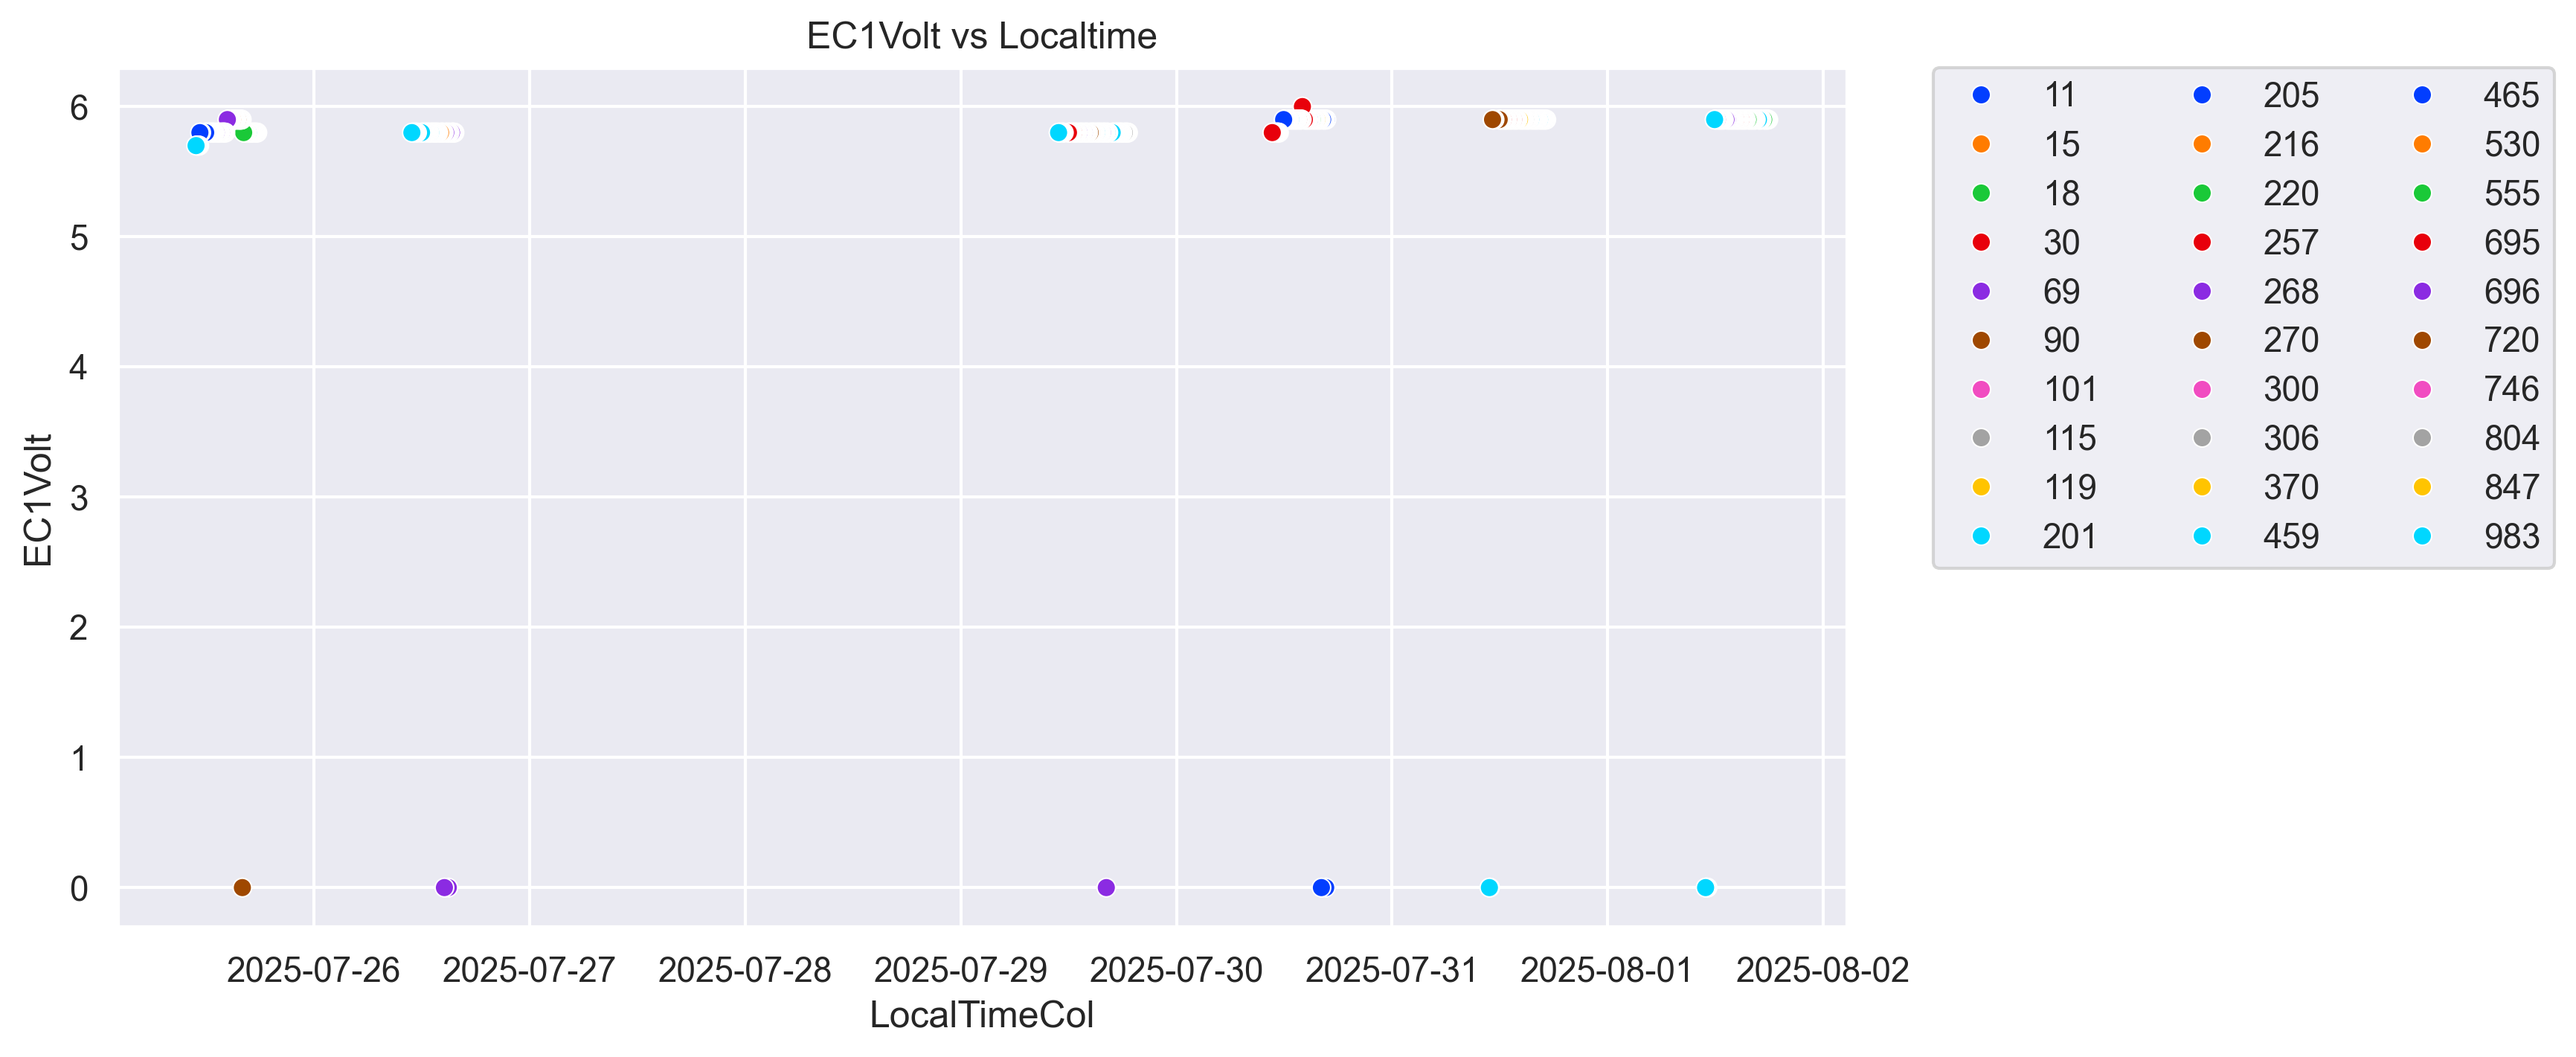

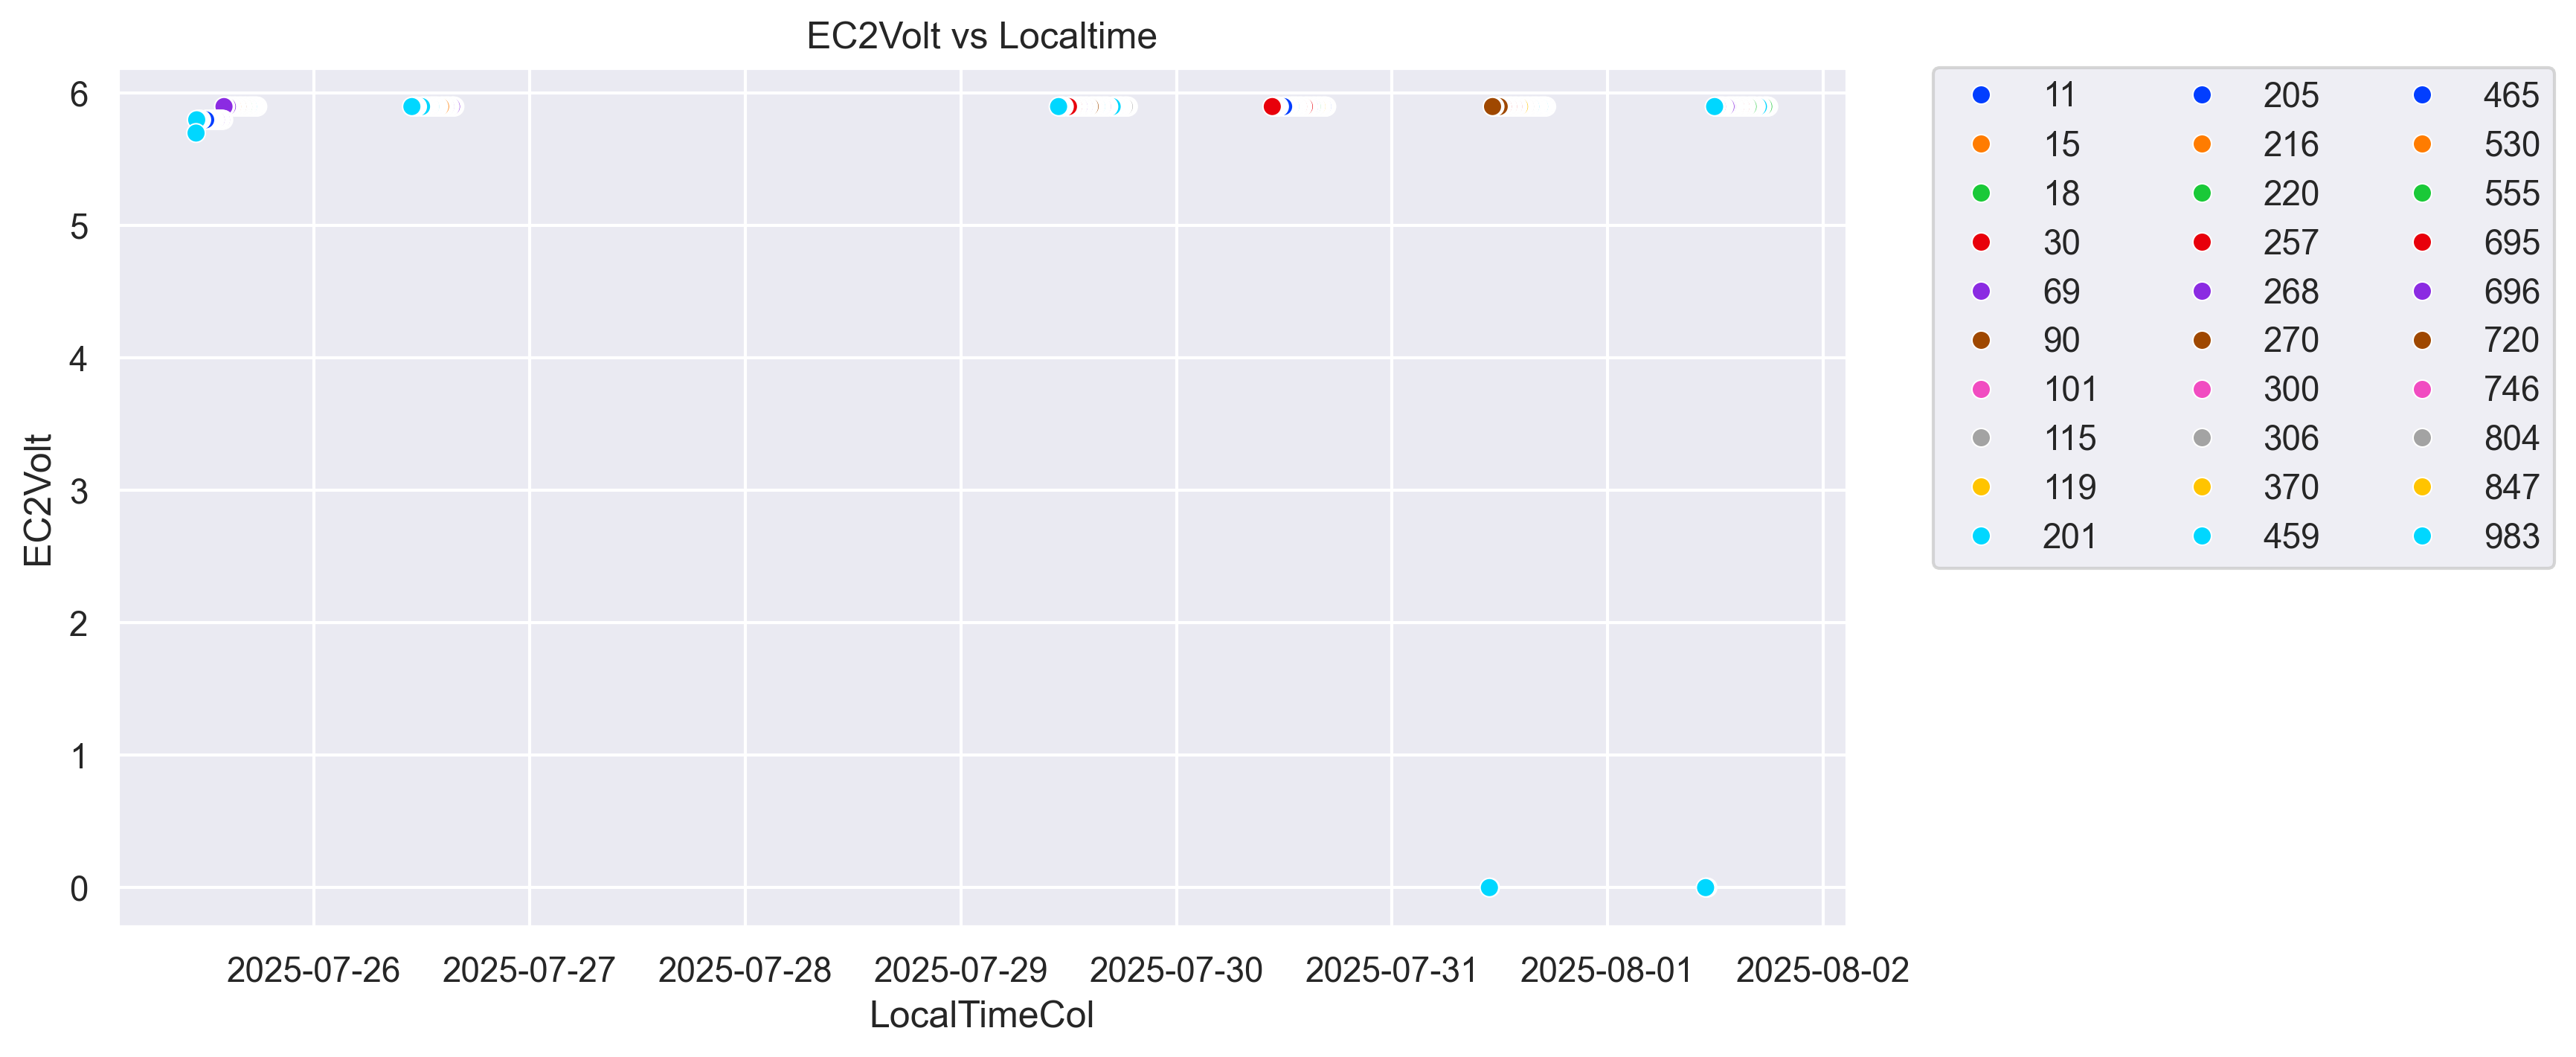

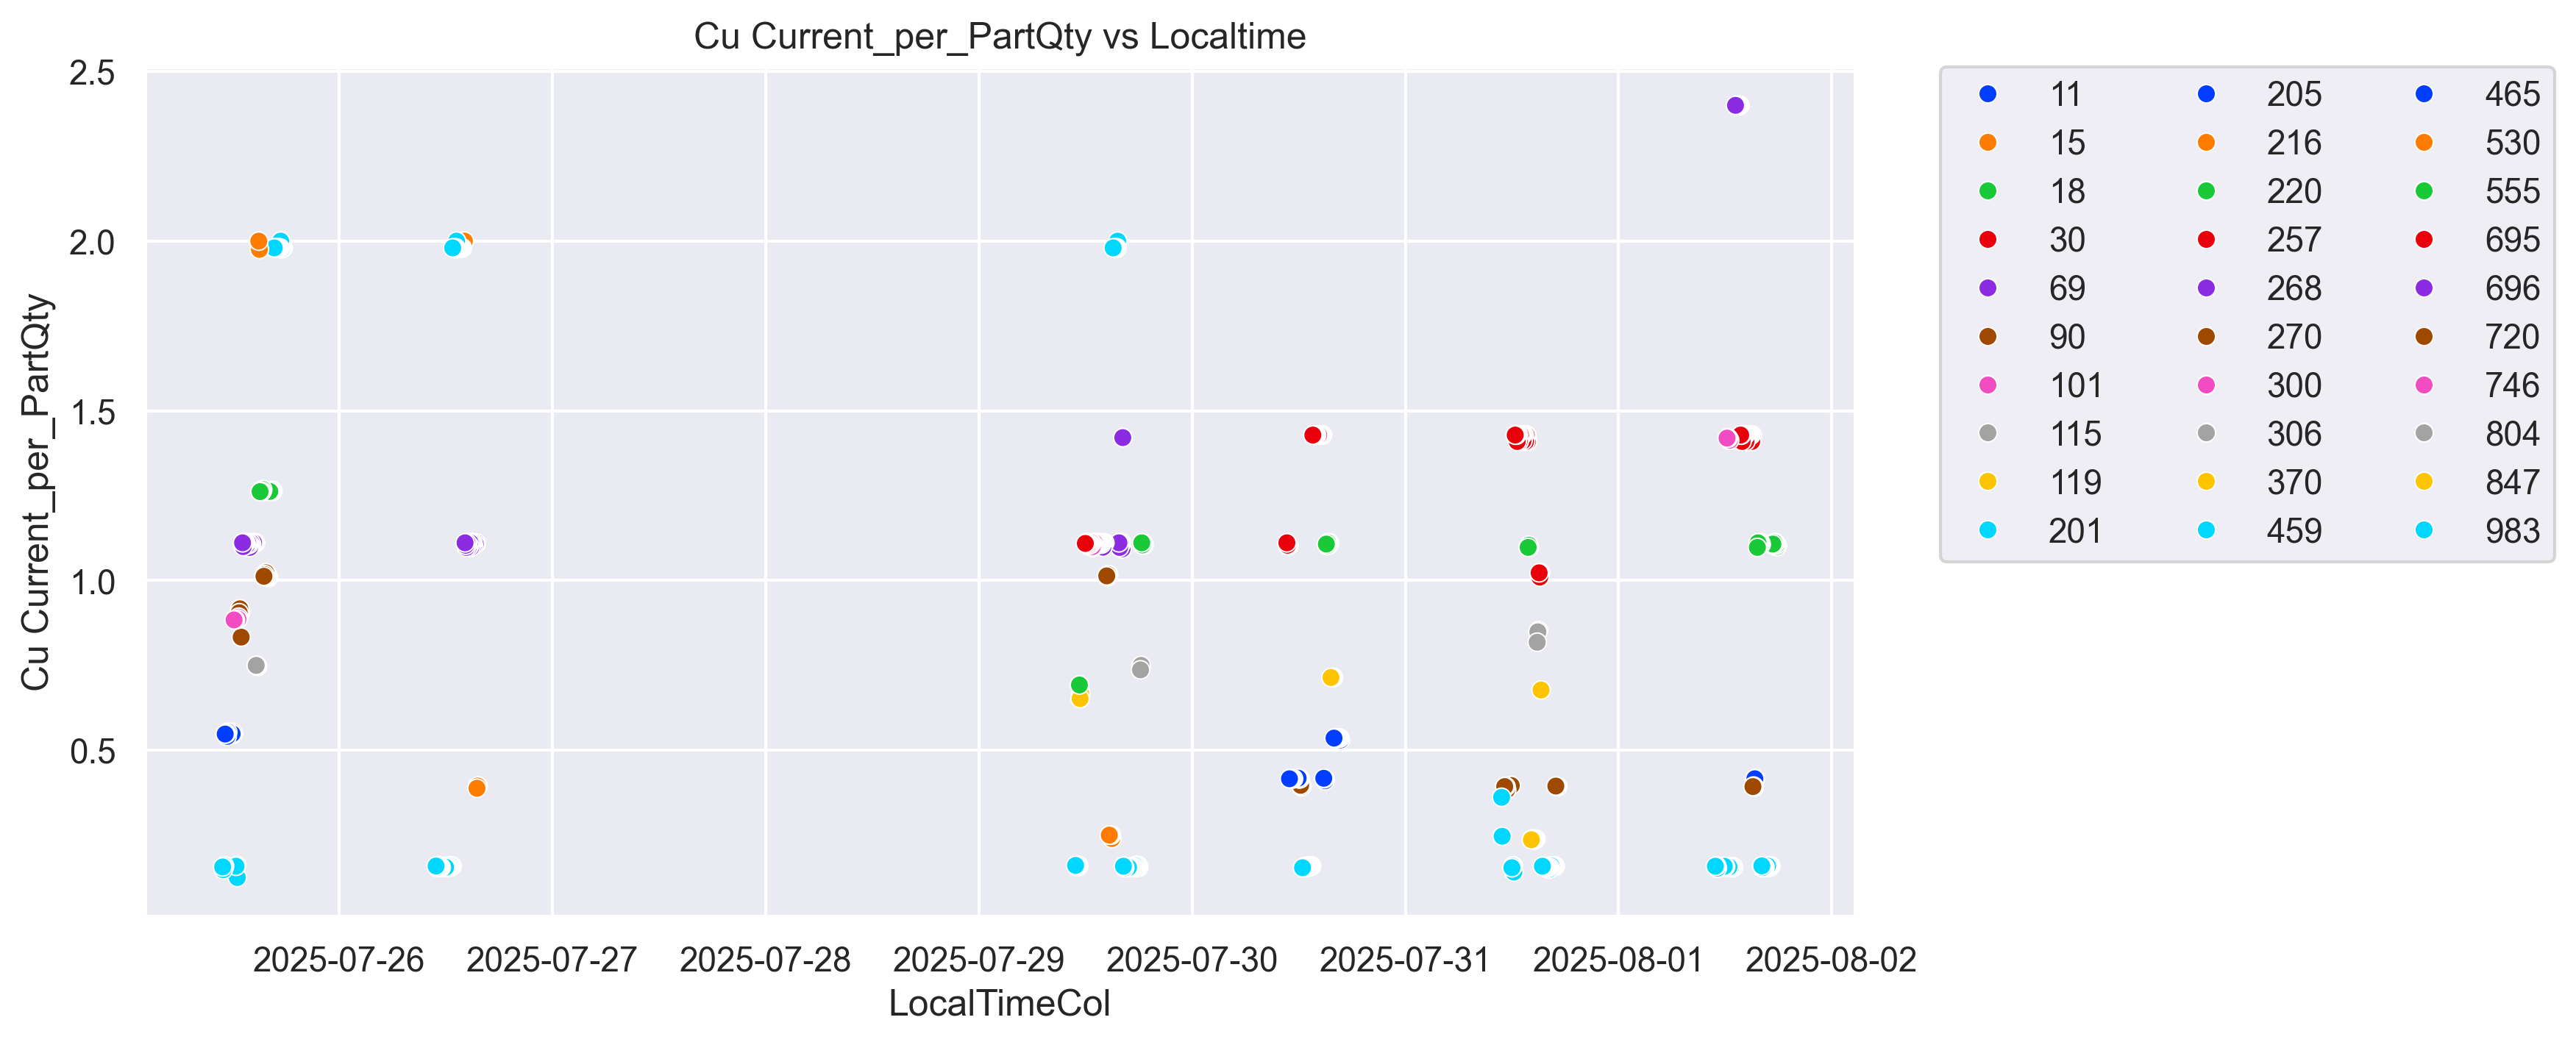

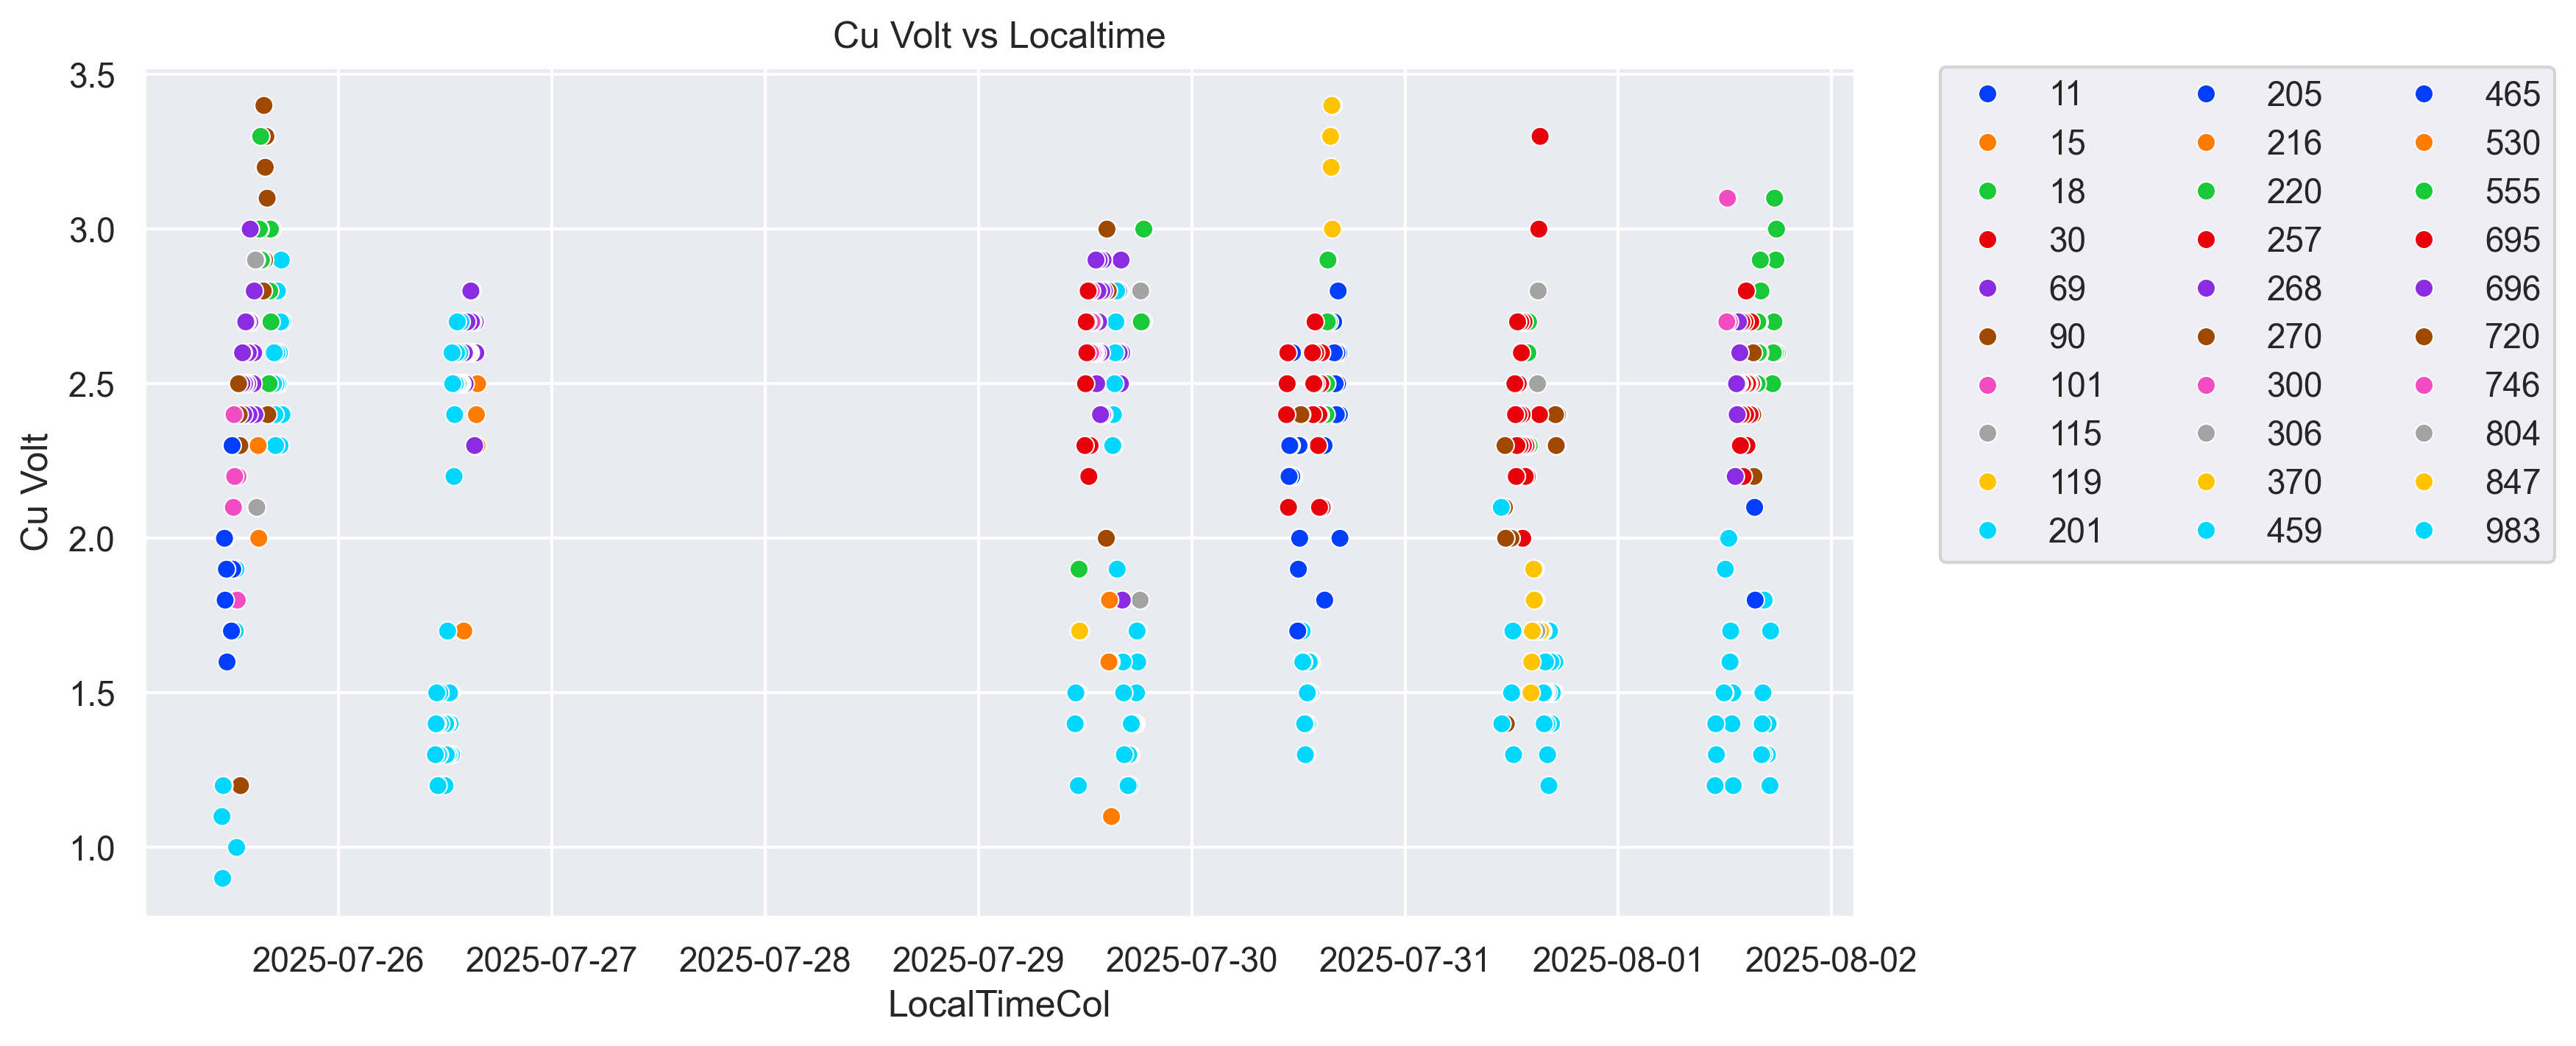

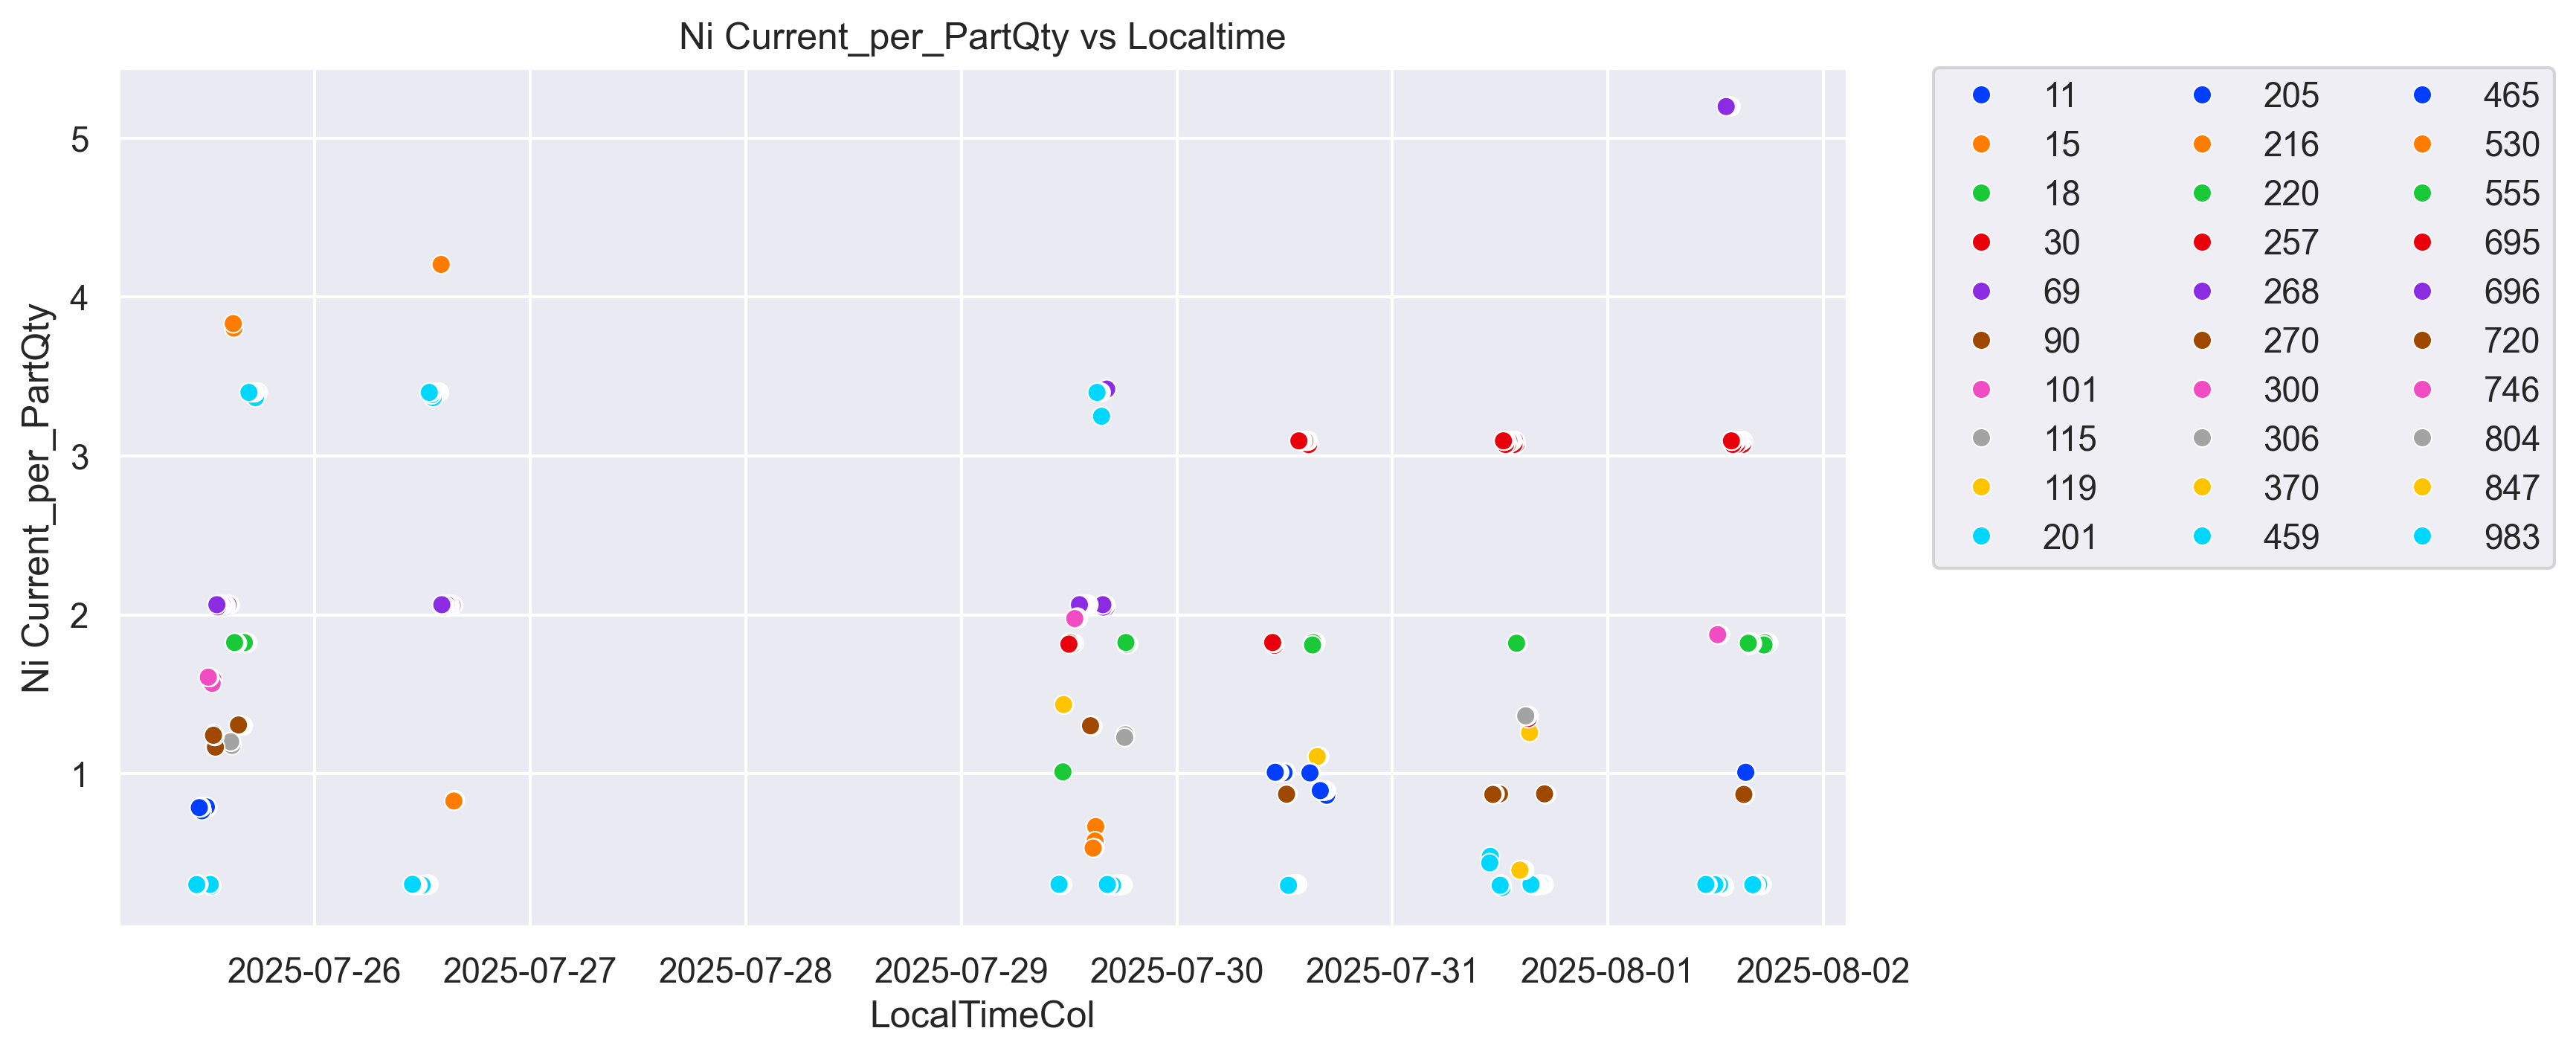

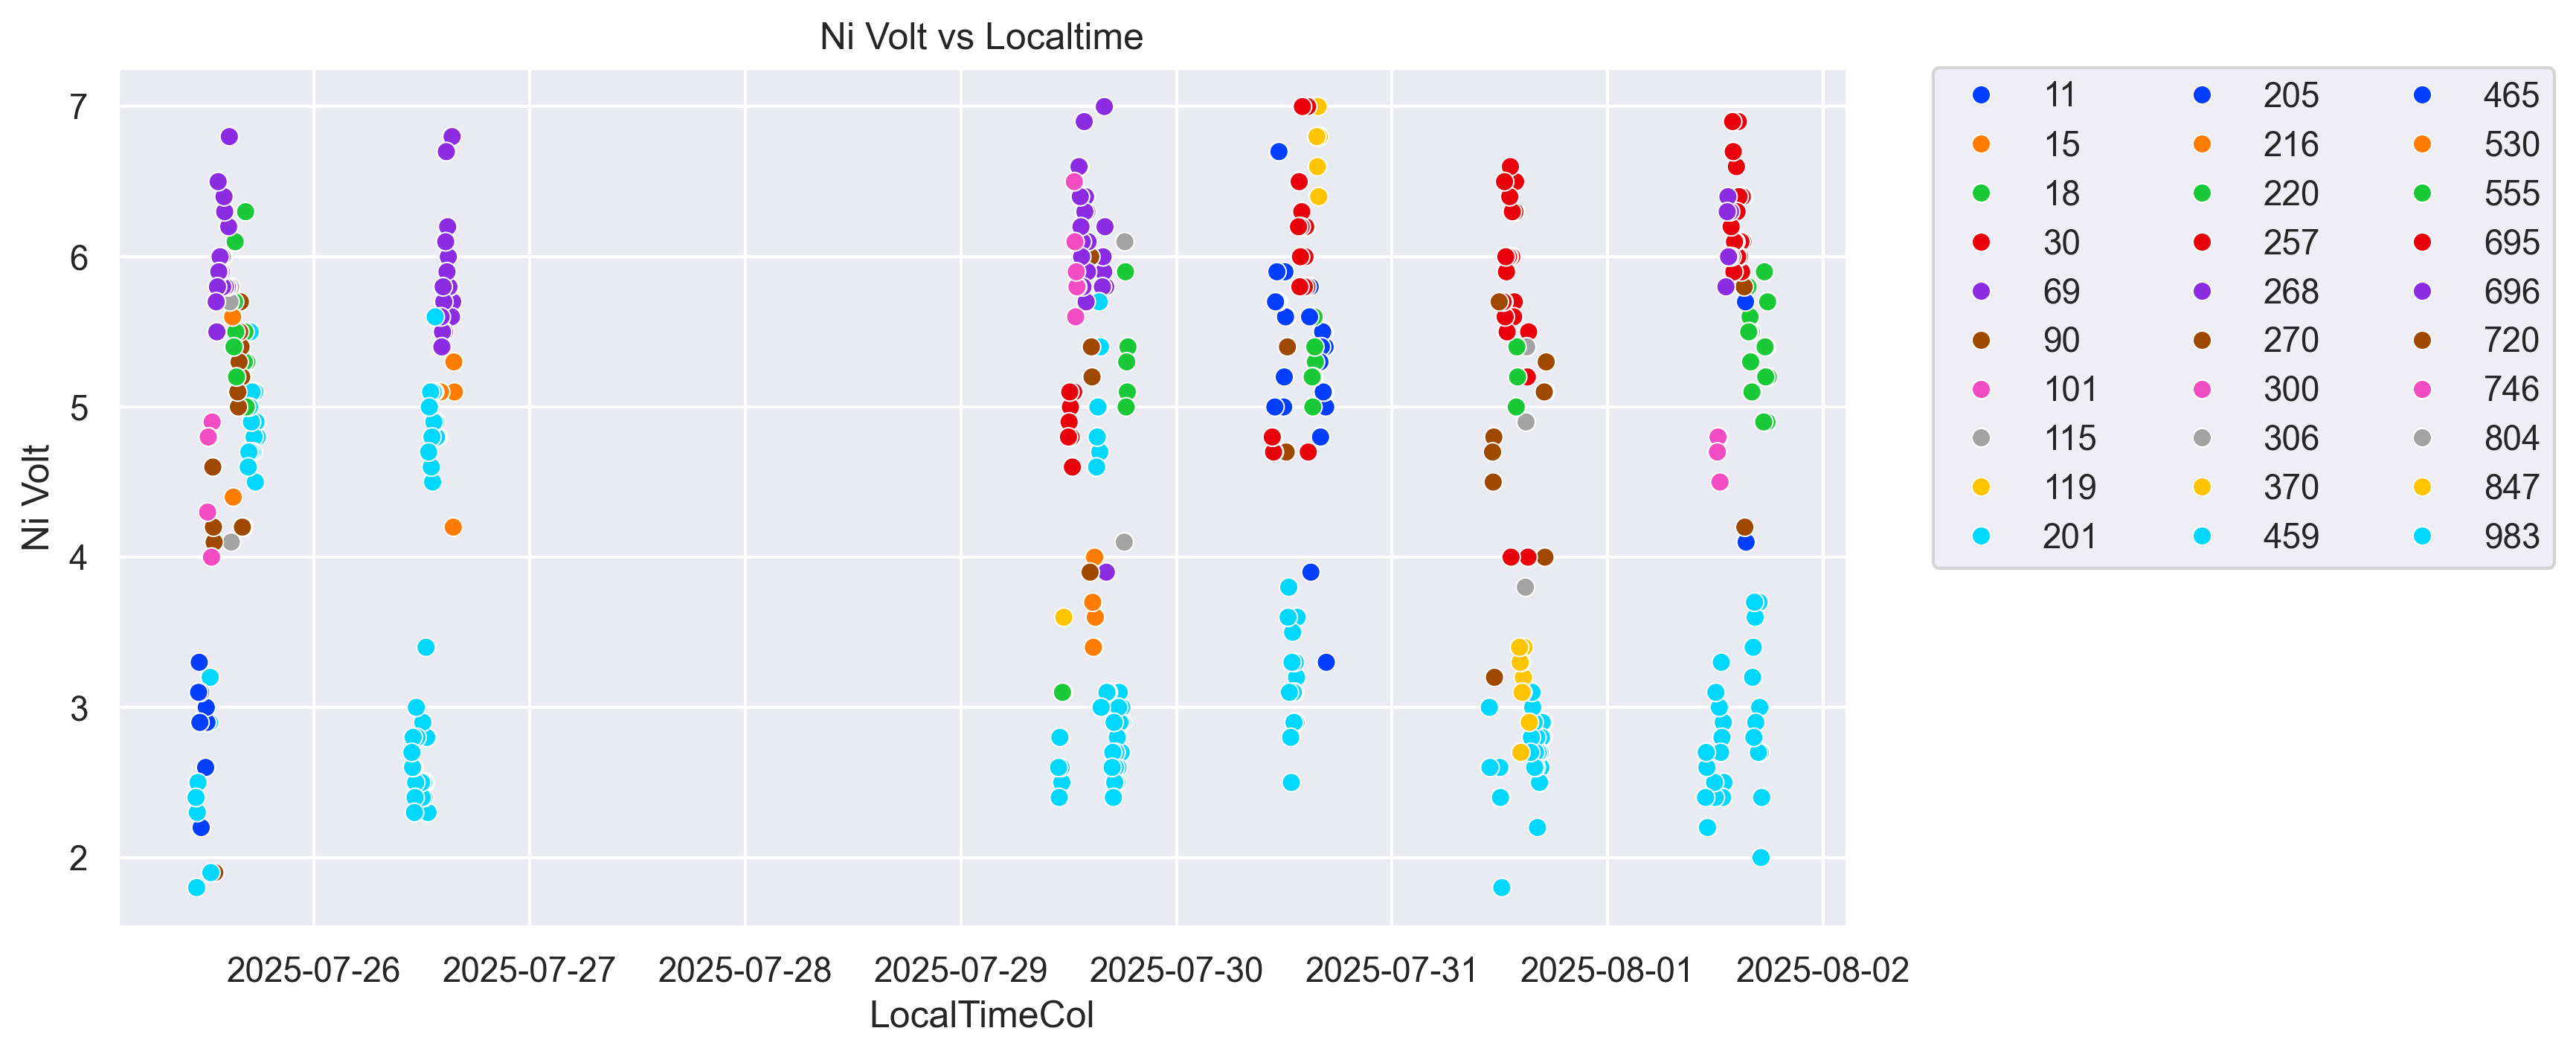

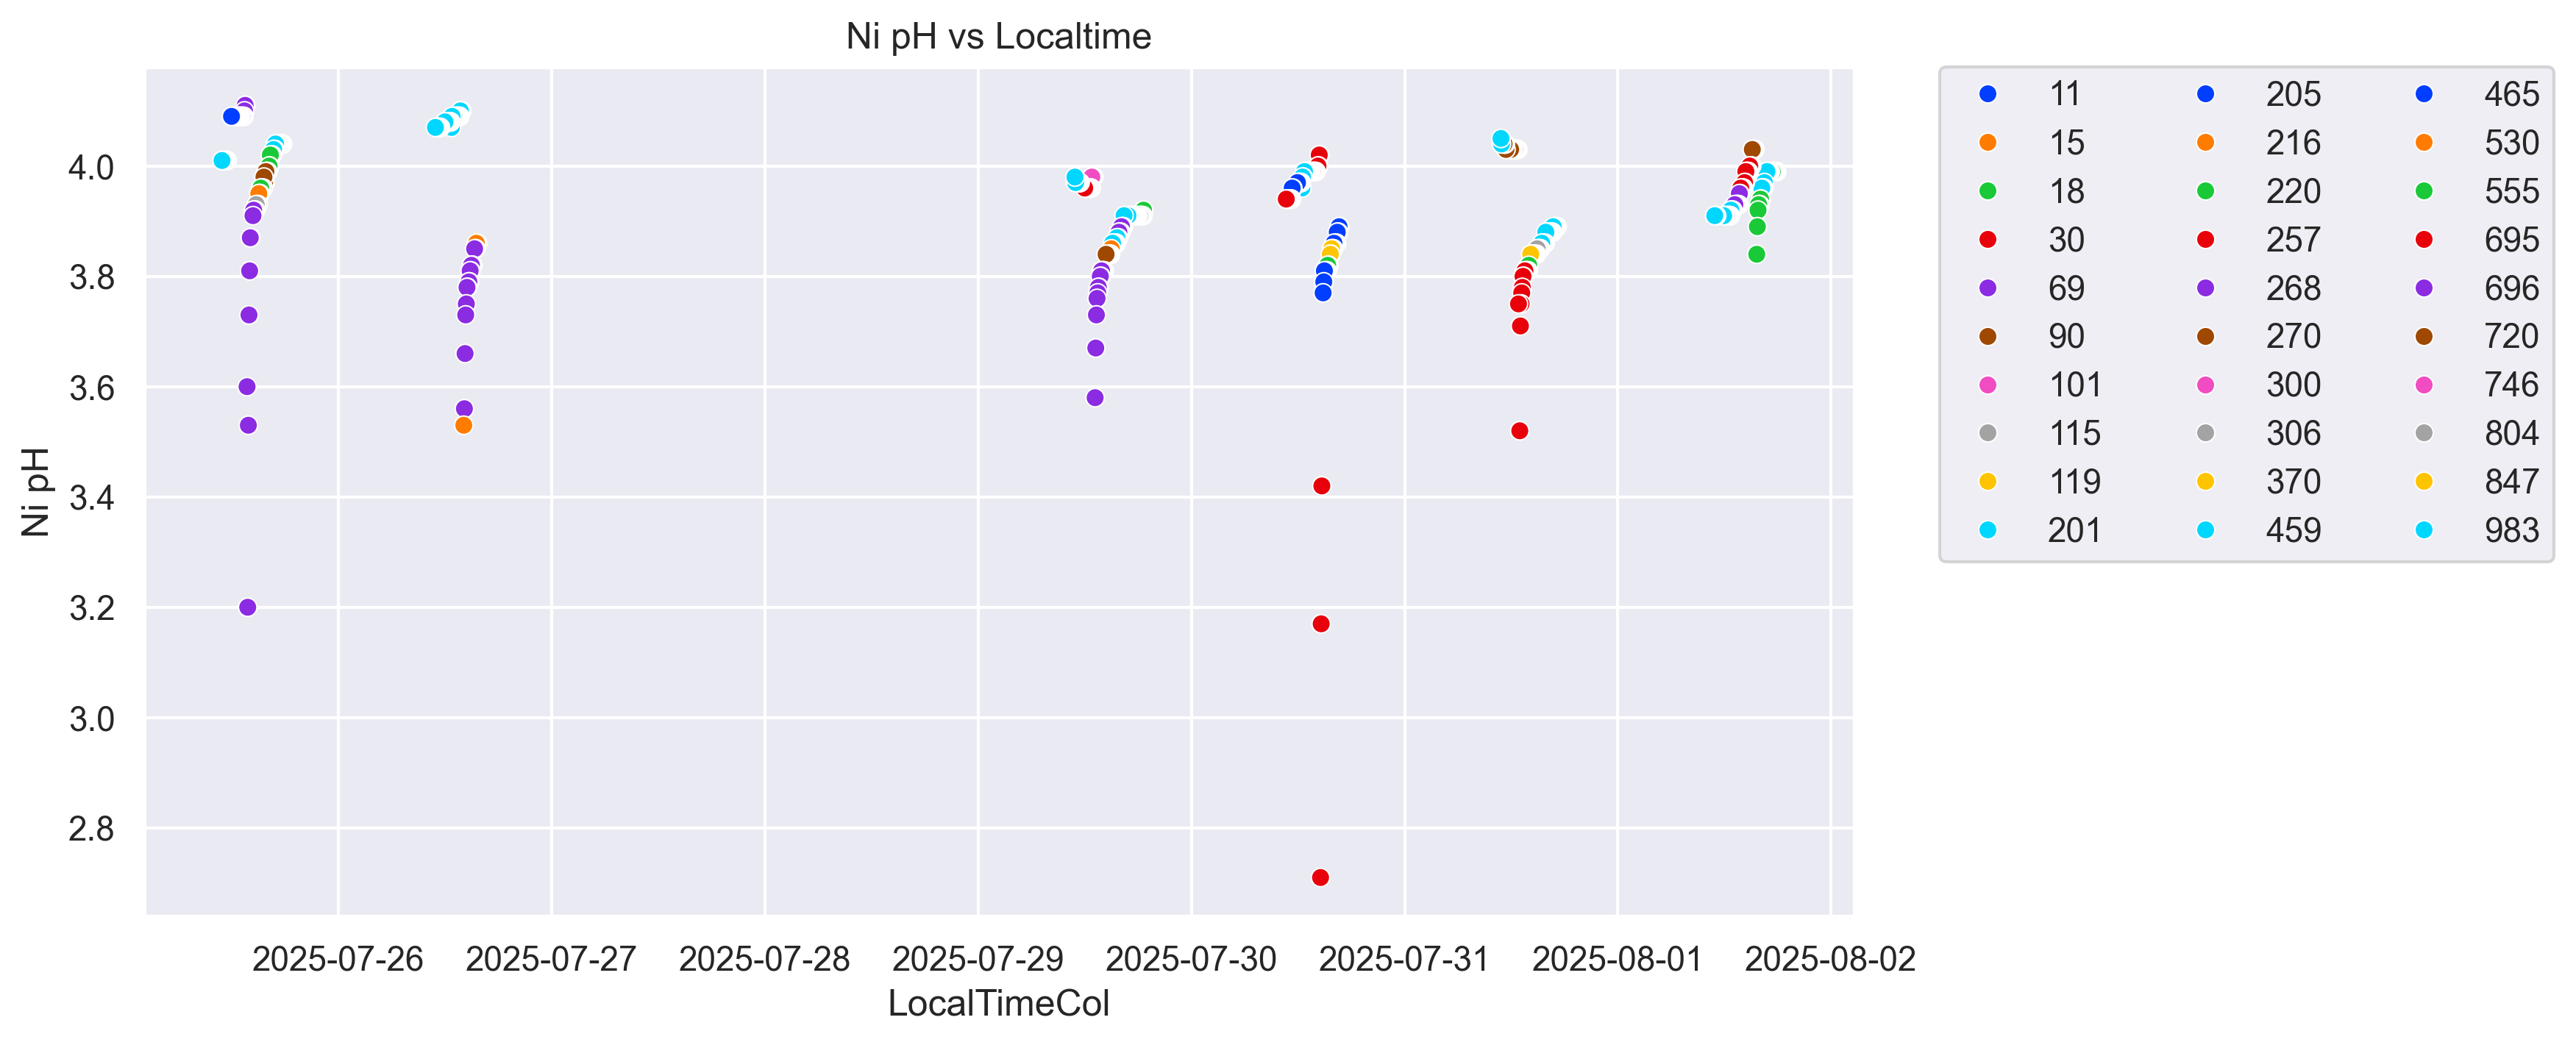

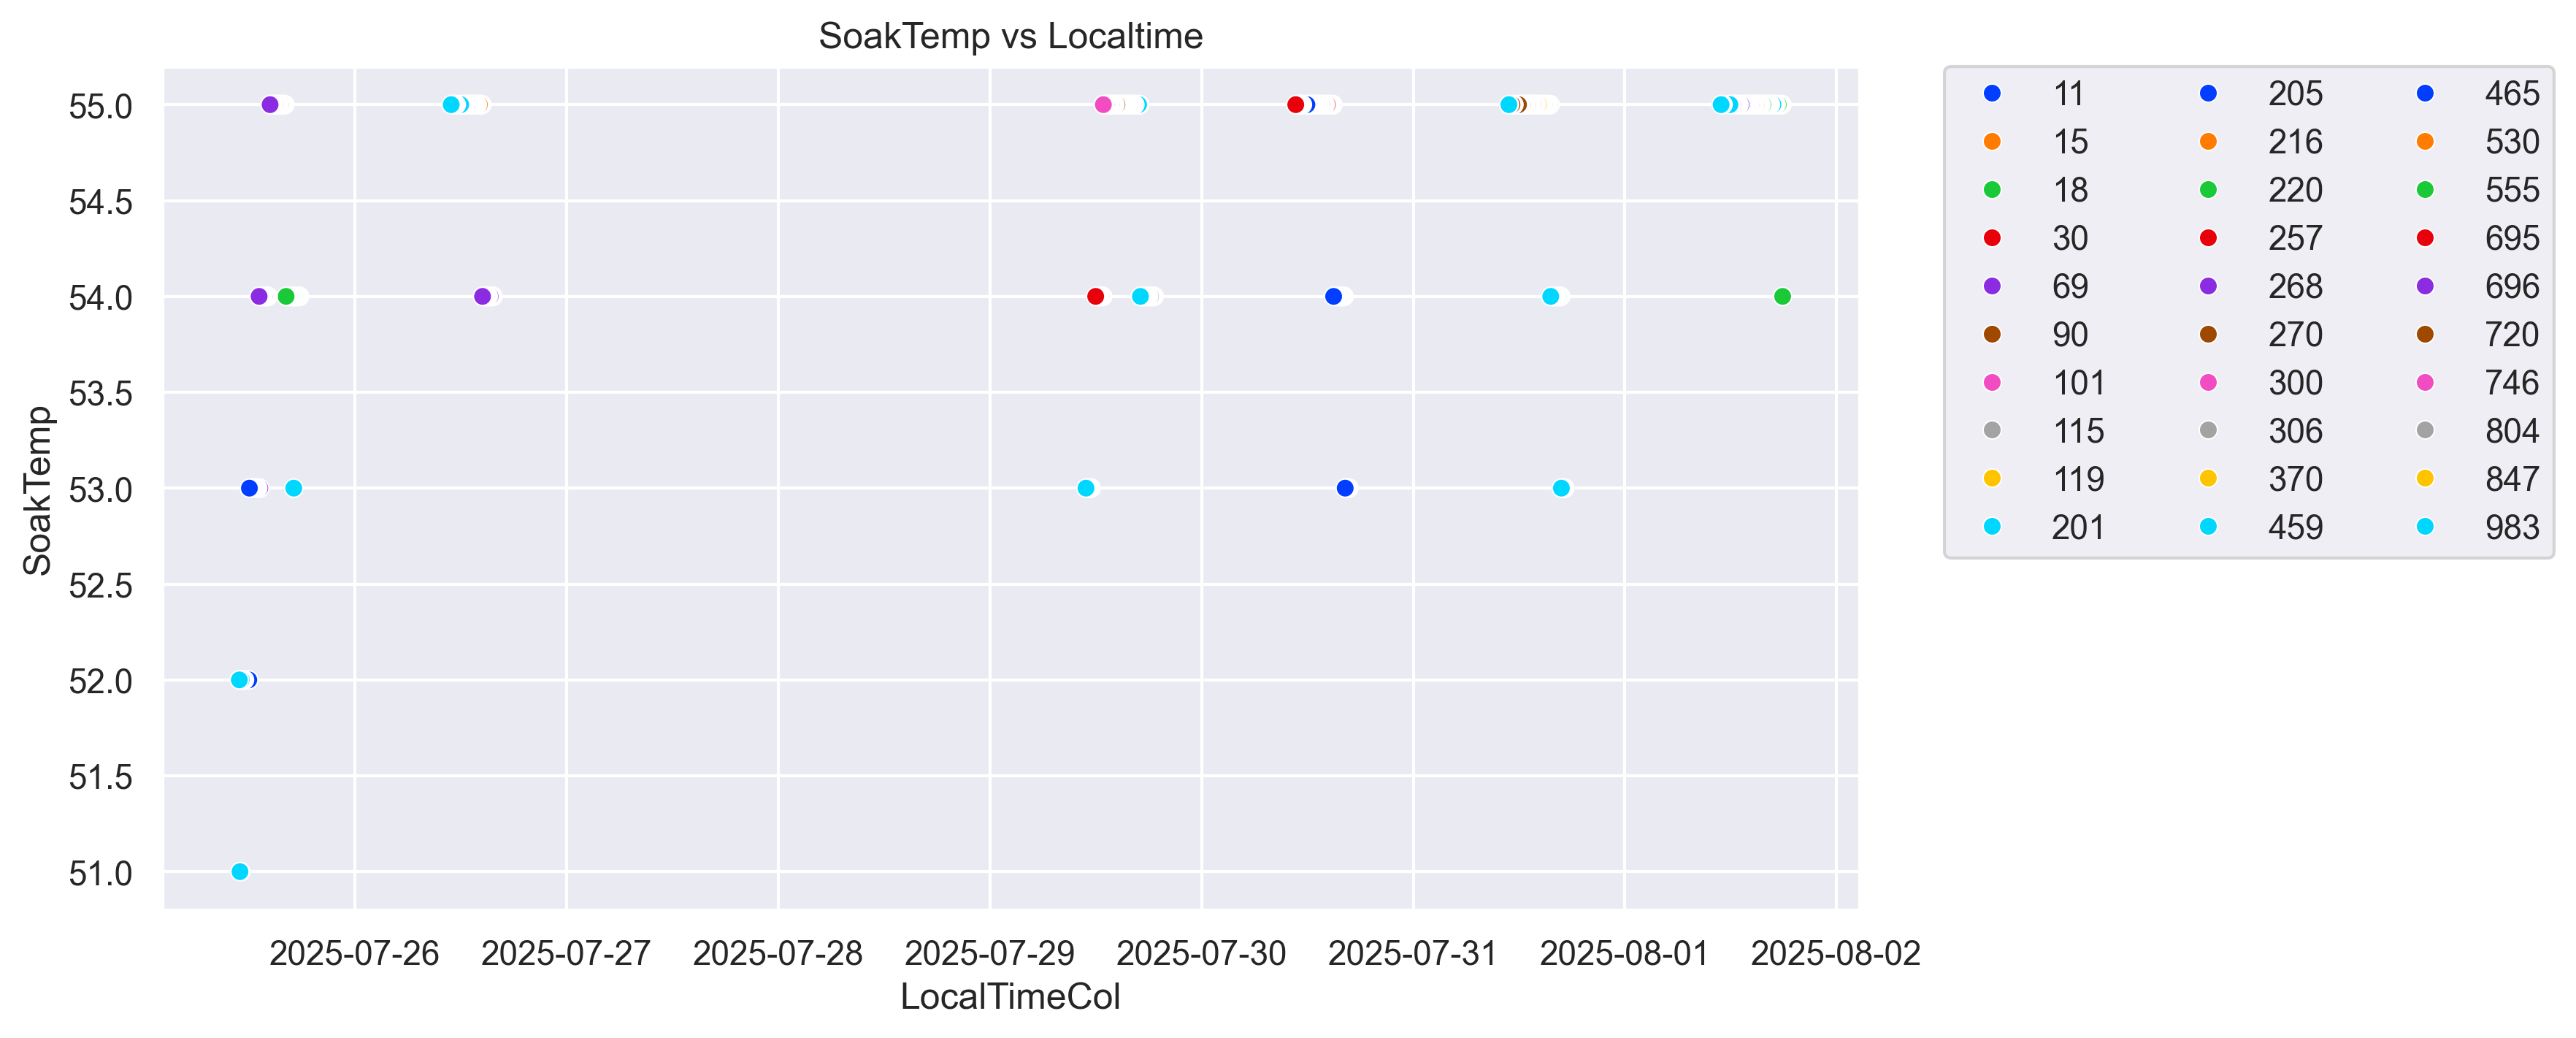

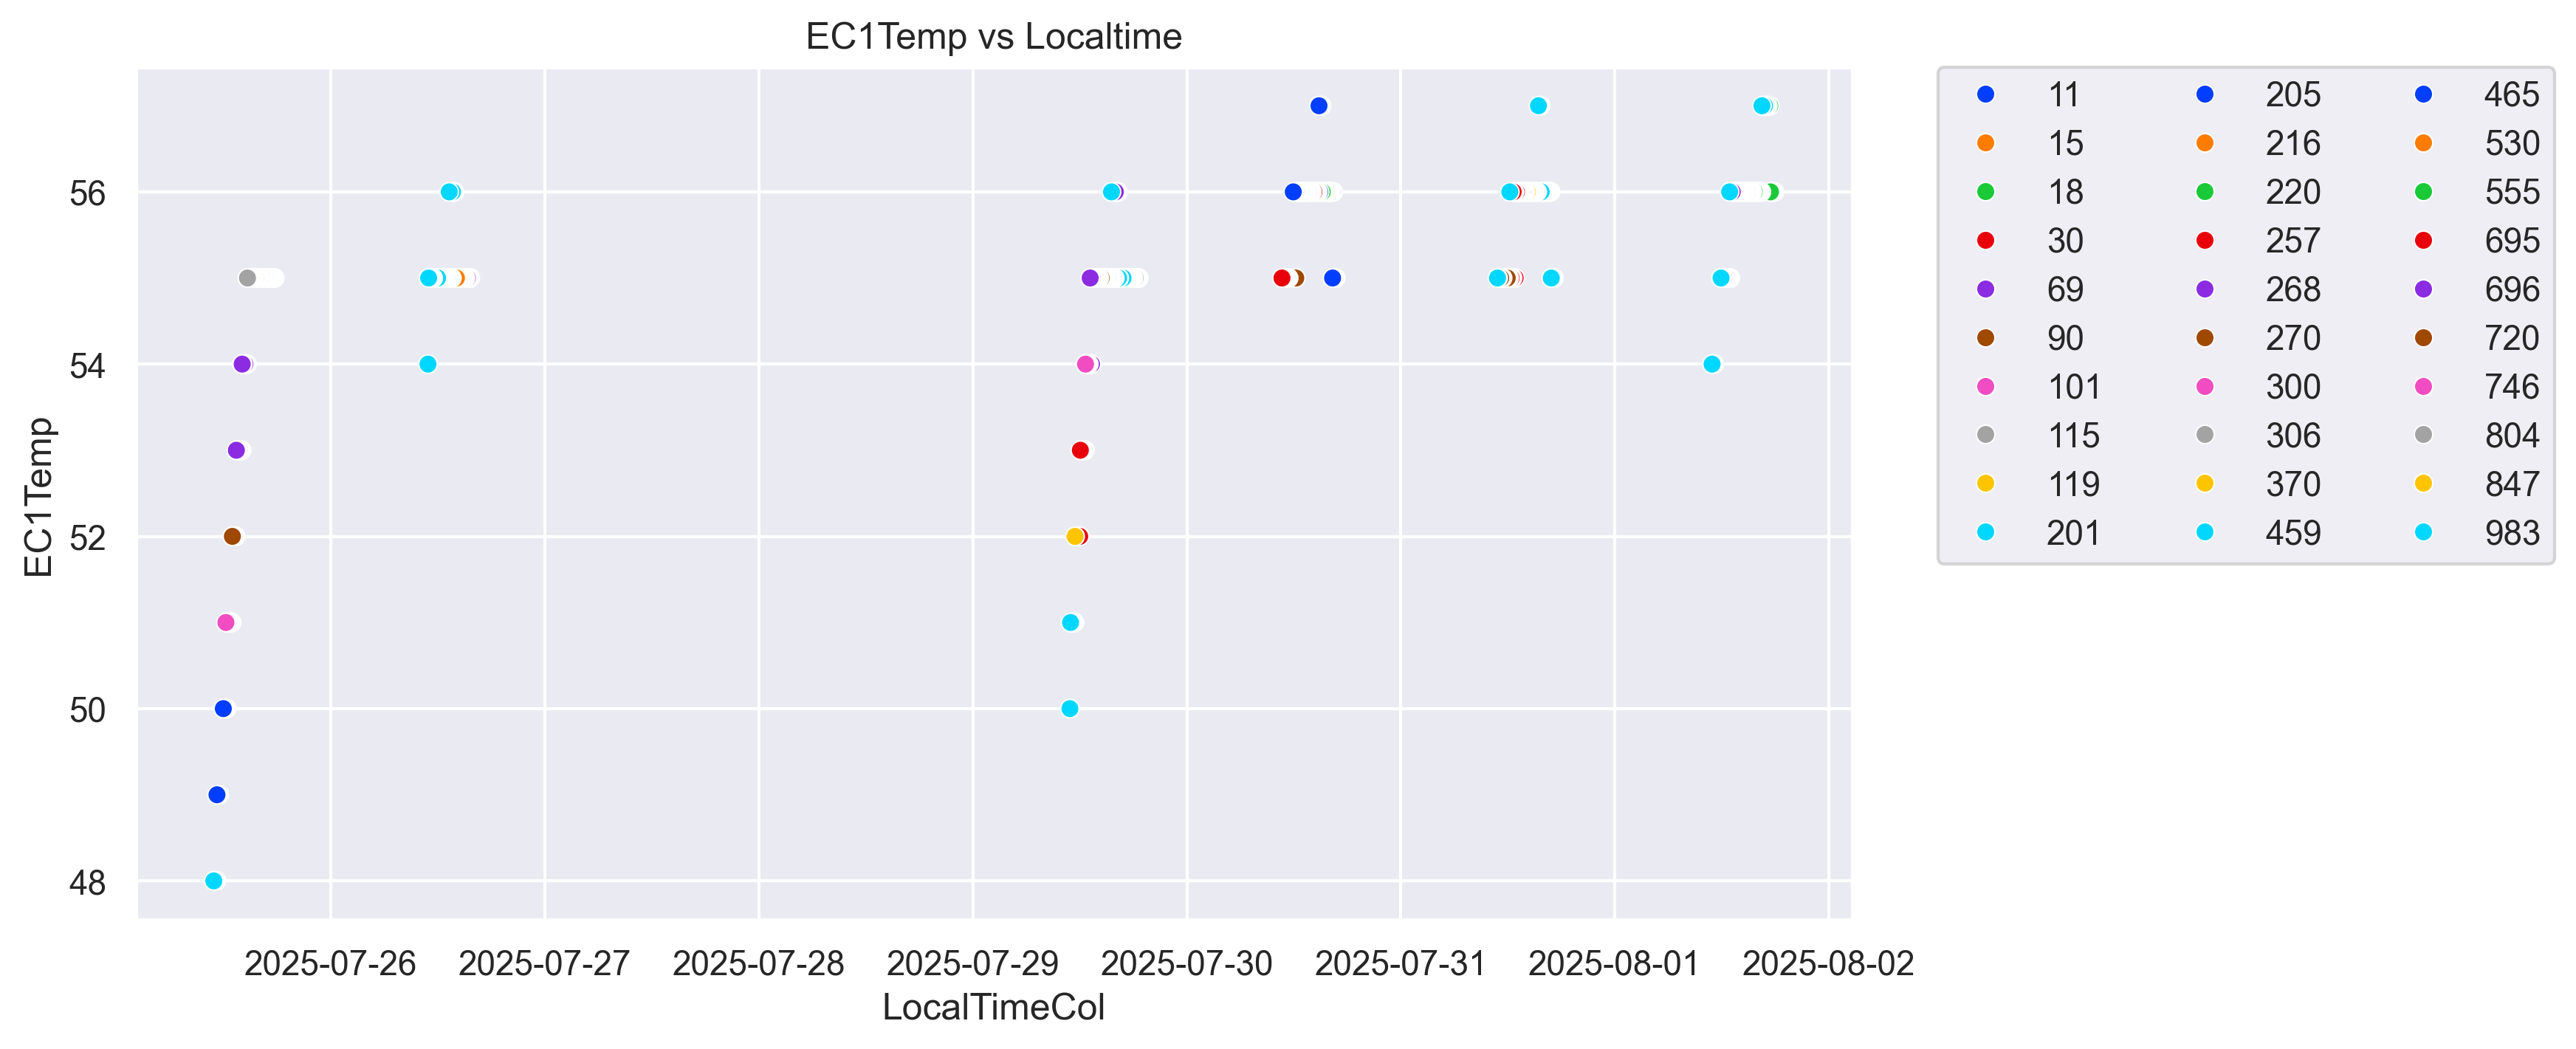

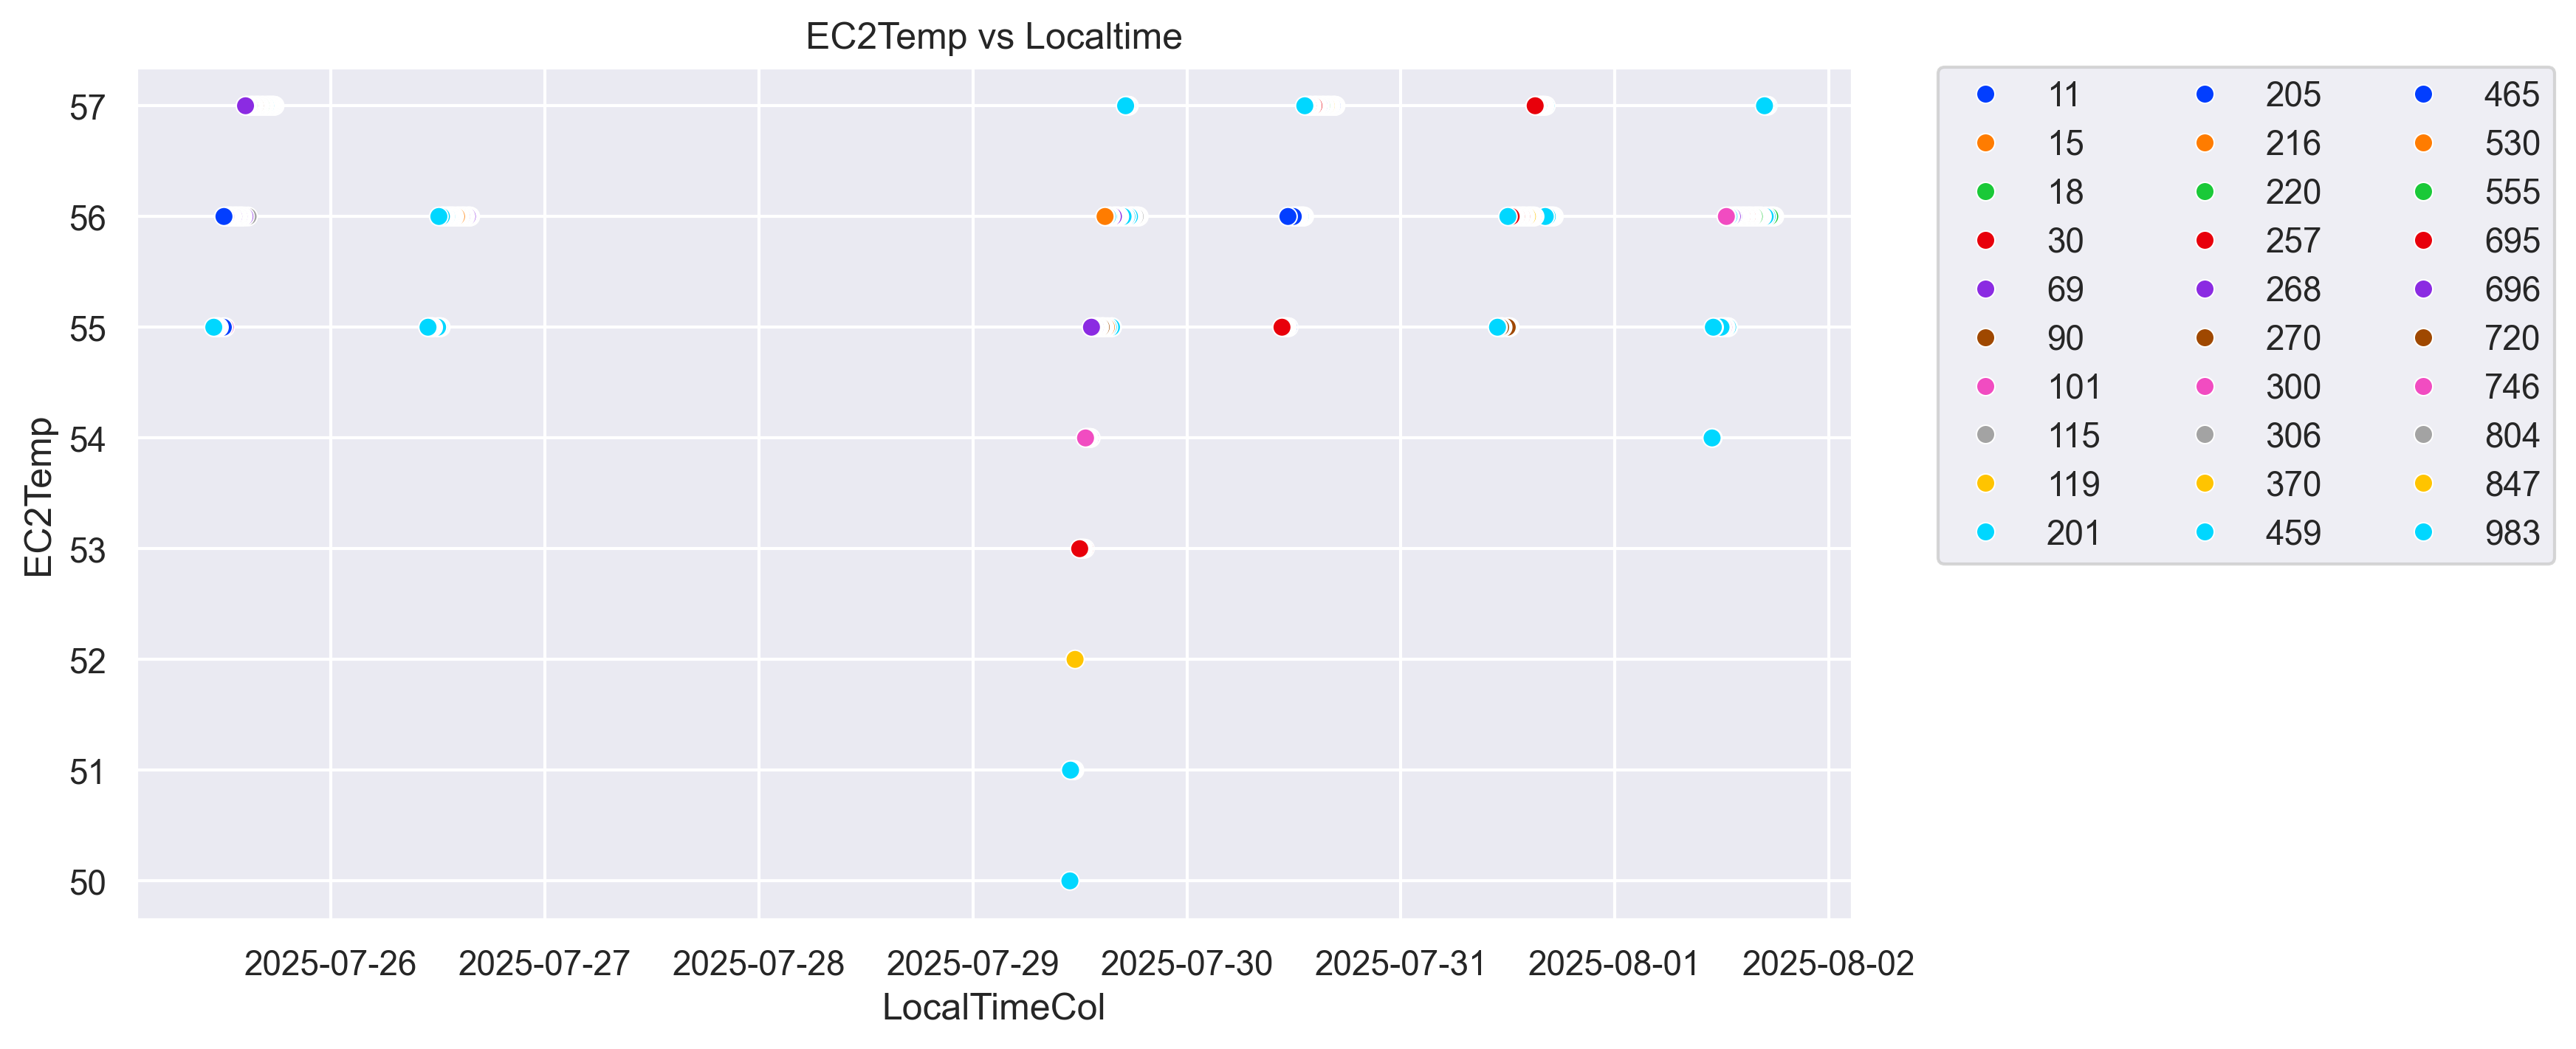

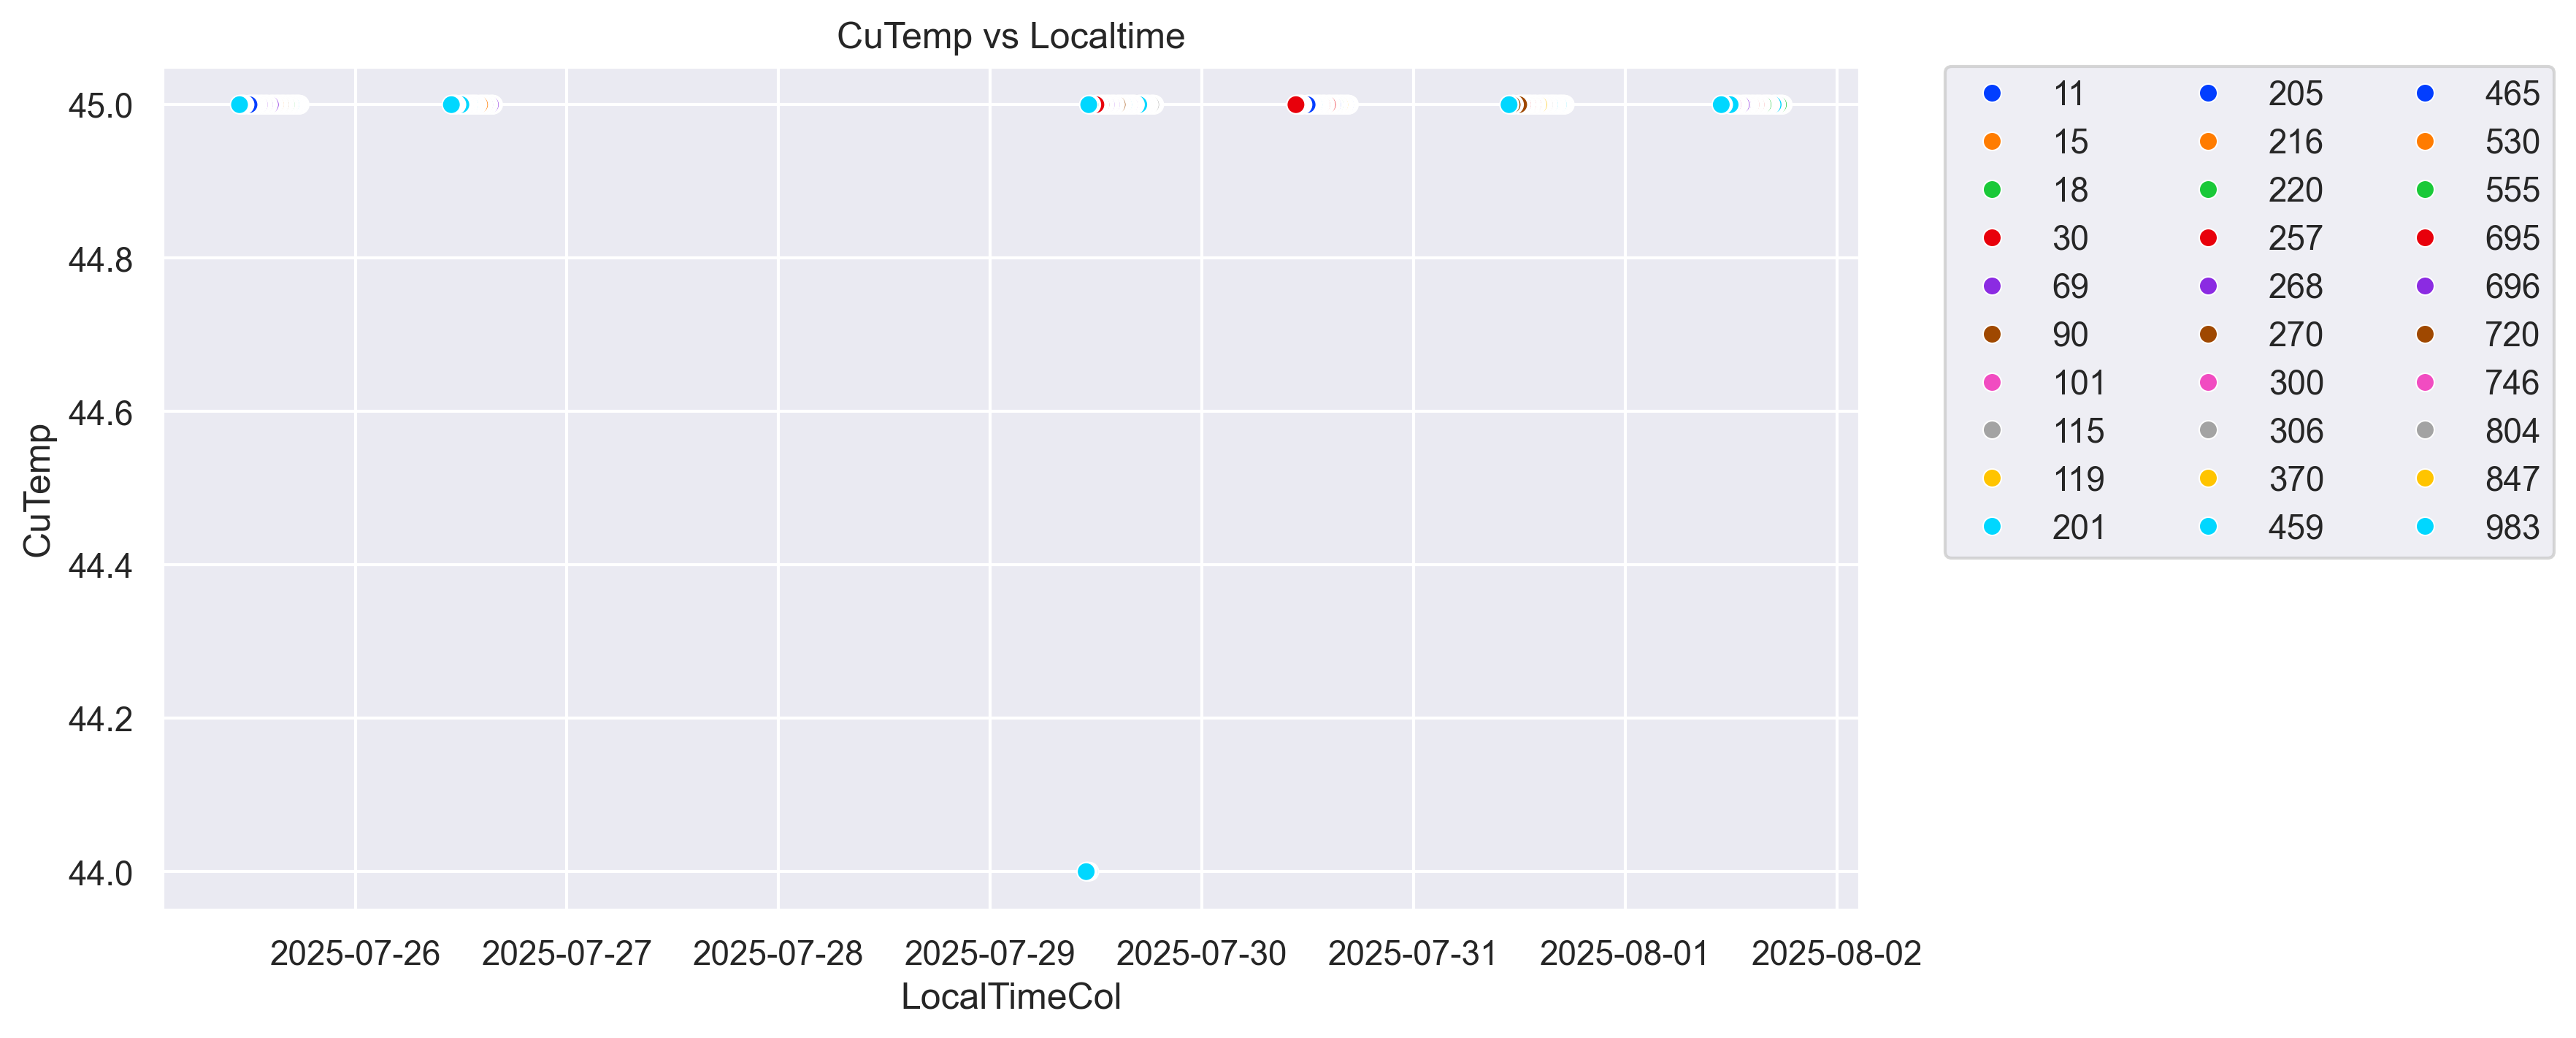

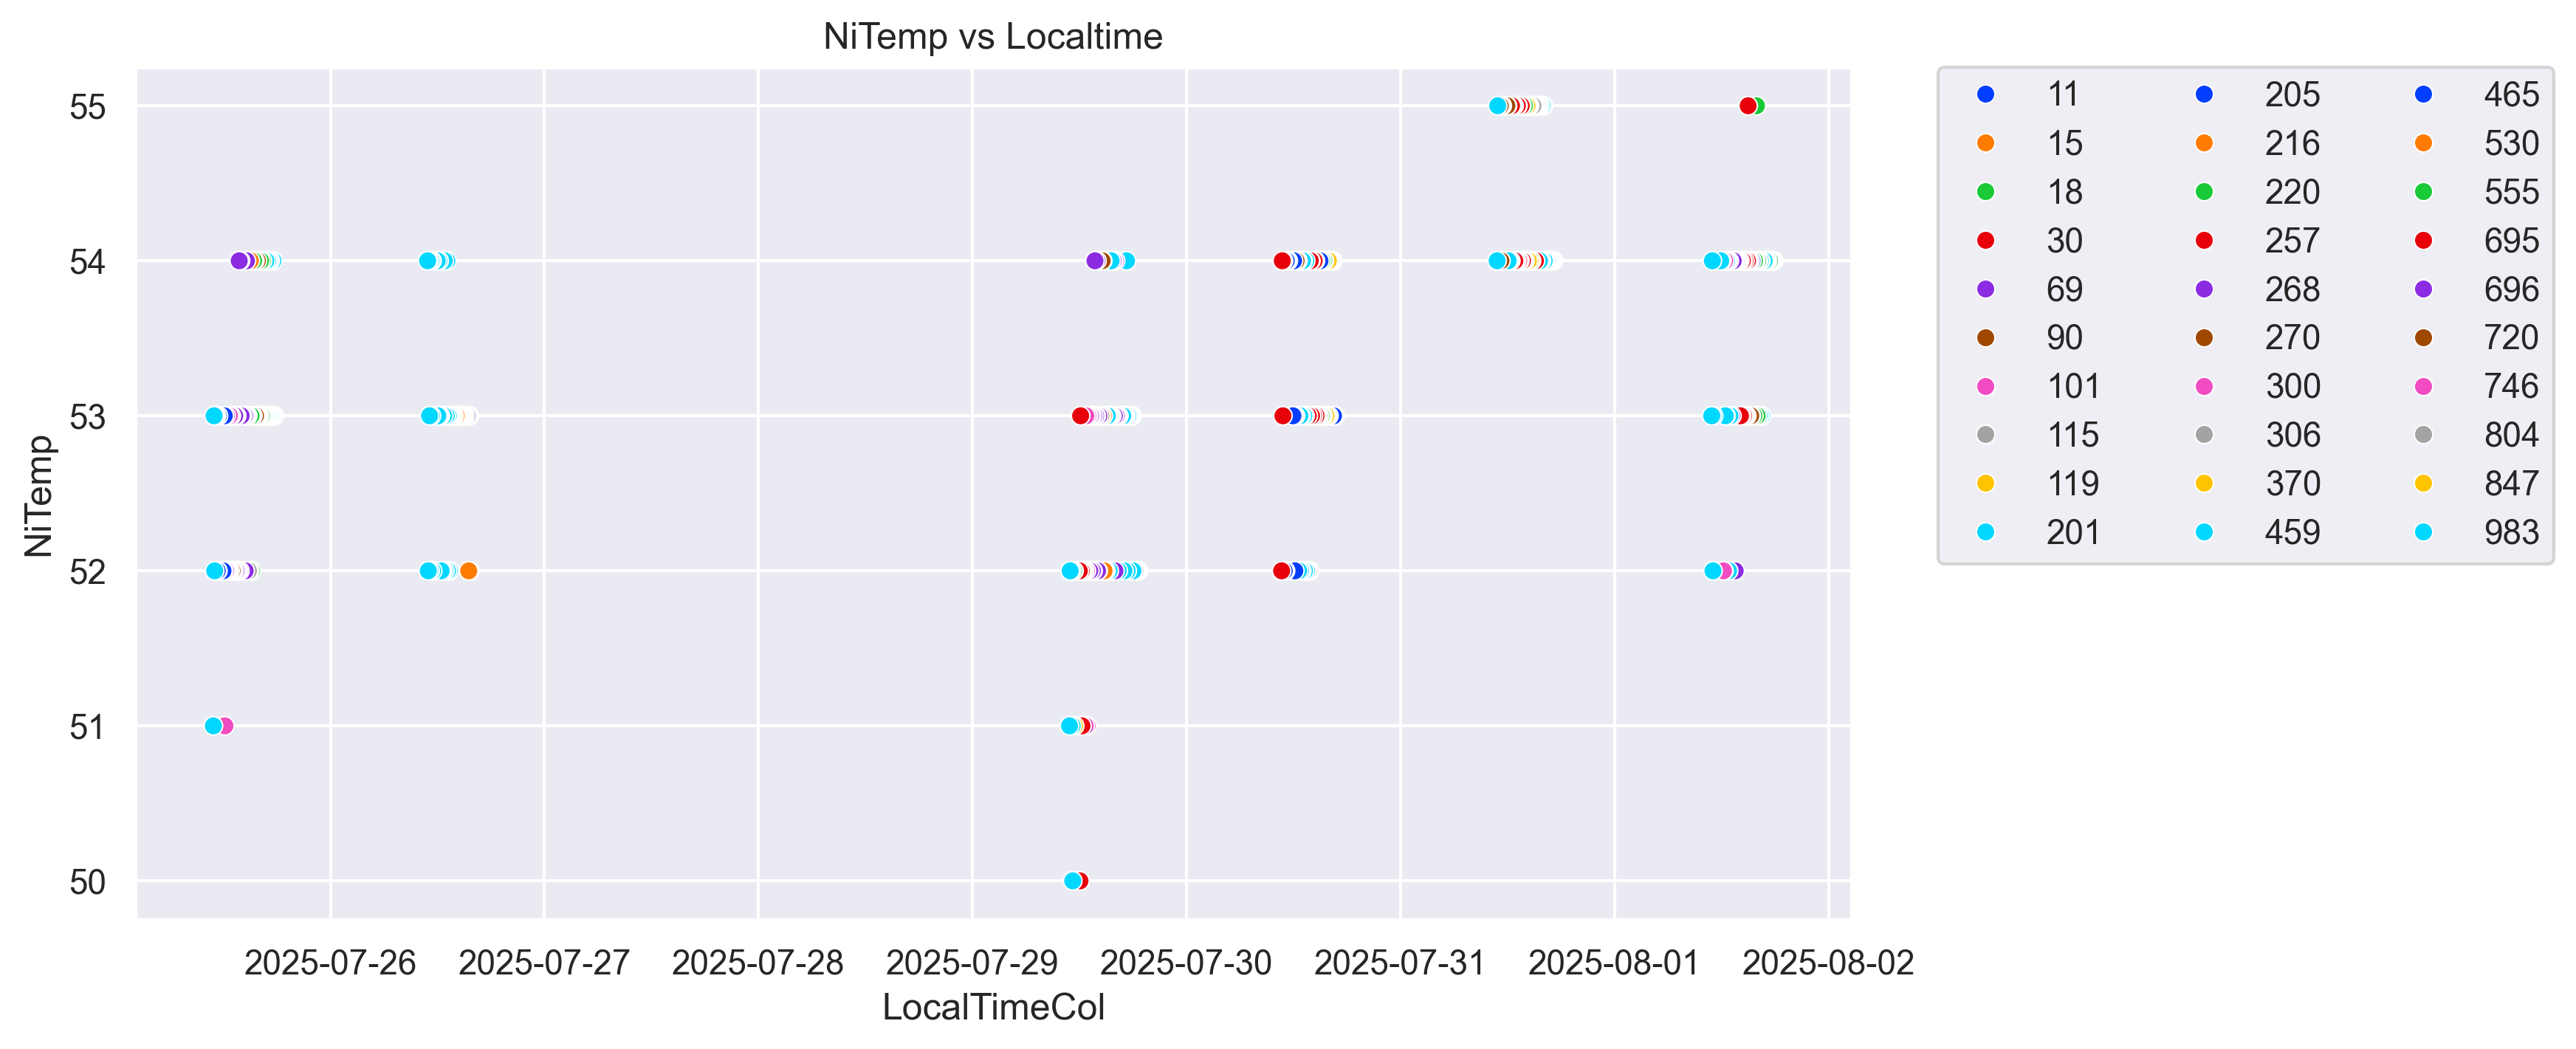

In [27]:
all_params = {
	'EC1Volt' : [0, 7],
	'EC2Volt' : [0, 7], 
	'Cu Current_per_PartQty' : [0, 2.5], 
	'Cu Volt' : [0, 5], 
	'Ni Current_per_PartQty' : [0, 4], 
	'Ni Volt' : [0, 8], 
	'Ni pH' : [2, 5], 
	'SoakTemp' : [50, 60], 
	'EC1Temp': [45, 60], 
	'EC2Temp': [45, 60], 
	'CuTemp': [40, 50], 
	'NiTemp' : [45, 60]
}

for param, lim in all_params.items():
	ax = sns.scatterplot(data=df,
						x='LocalTimeCol',
						y=param,
						hue='PartNo',
						palette='bright',
						
						)
	plt.title(f"{param} vs Localtime")
	plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, ncols=3)
	plt.show()

In [28]:
def plot_param_all_day(param, lim):
	sns.set_theme(rc={"figure.dpi": 300})
	PART_NO = df['PartNo'].unique()
	UNITS_REPLACE = {
		'Volt' : ' ' + 'Voltage (V)',
		'Current' : ' ' + 'Current (A)',
		'Current_per_PartQty' : 'Current/PartQty (A/Piece)',
		'Temp' : ' ' + 'Temperature (°C)'
	}
	for part in PART_NO:
		condition = (df['PartNo'] == part)
		day_df = df[condition]
		sns.set_theme(rc={'figure.figsize':(15, 10)})
		ax = sns.scatterplot(
			data=day_df,
			x='LocalTimeCol',
			y=param,
			hue='PartNo',
			palette="bright",
			s=100,
		)
		sns.move_legend(
			ax, "upper left", bbox_to_anchor=(1, 1)
		)
		ax.set_title(f'{param} of PartNo {part}', fontdict={'fontsize':16})

		ax.set_ylim(lim[0], lim[1])

		y_label = param
		for key, unit in UNITS_REPLACE.items():
			if key in param:
				y_label = param.replace(key, unit)
		
		ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
		plt.setp(ax.get_xticklabels(), rotation=45)
		# ax.xaxis.set_label_text("Time")
		ax.yaxis.set_label_text(y_label)
		param_dir = f"{directory_name}/{param}_PartNo"
		if not os.path.isdir(param_dir):
			os.mkdir(param_dir)
		file_name = f"{param}_PartNo_{part}.png"
		file_path = f"{param_dir}/{file_name}"
		plt.savefig(file_path)
		plt.show()

In [29]:
# current_params =  {
# 	'Cu Current_per_PartQty' : [0, 2.5], 
# 	'Ni Current_per_PartQty' : [0, 4],
# }
# for param, lim in current_params.items():
# 	plot_param_all_day(param, lim)

In [30]:
# sns.set_theme(rc={"figure.dpi": 300})
# for param, lim in all_params.items():
# 	plot_param_each_day(param, lim)

In [31]:
def get_color_gradient(lower_bound, upper_bound, length):
    """
    Generates a color gradient from lower_bound to upper_bound.

    Args:
        lower_bound (str): The starting hex color code (e.g., "#FF0000").
        upper_bound (str): The ending hex color code (e.g., "#0000FF").
        length (int): The number of colors in the gradient.

    Returns:
        list: A list of hex color codes representing the gradient.
    """
    if length < 2:
        return [lower_bound] if length == 1 else []

    # Convert hex to RGB tuples
    def hex_to_rgb(hex_color):
        hex_color = hex_color.lstrip('#')
        return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

    lower_rgb = hex_to_rgb(lower_bound)
    upper_rgb = hex_to_rgb(upper_bound)

    gradient = []
    for i in range(length):
        # Calculate the interpolation factor
        factor = i / (length - 1)

        # Interpolate each RGB channel
        r = int(lower_rgb[0] + (upper_rgb[0] - lower_rgb[0]) * factor)
        g = int(lower_rgb[1] + (upper_rgb[1] - lower_rgb[1]) * factor)
        b = int(lower_rgb[2] + (upper_rgb[2] - lower_rgb[2]) * factor)

        # Convert the interpolated RGB back to hex
        gradient.append(f'#{r:02x}{g:02x}{b:02x}')

    return gradient

## Plot Part number quantity as a pie chart

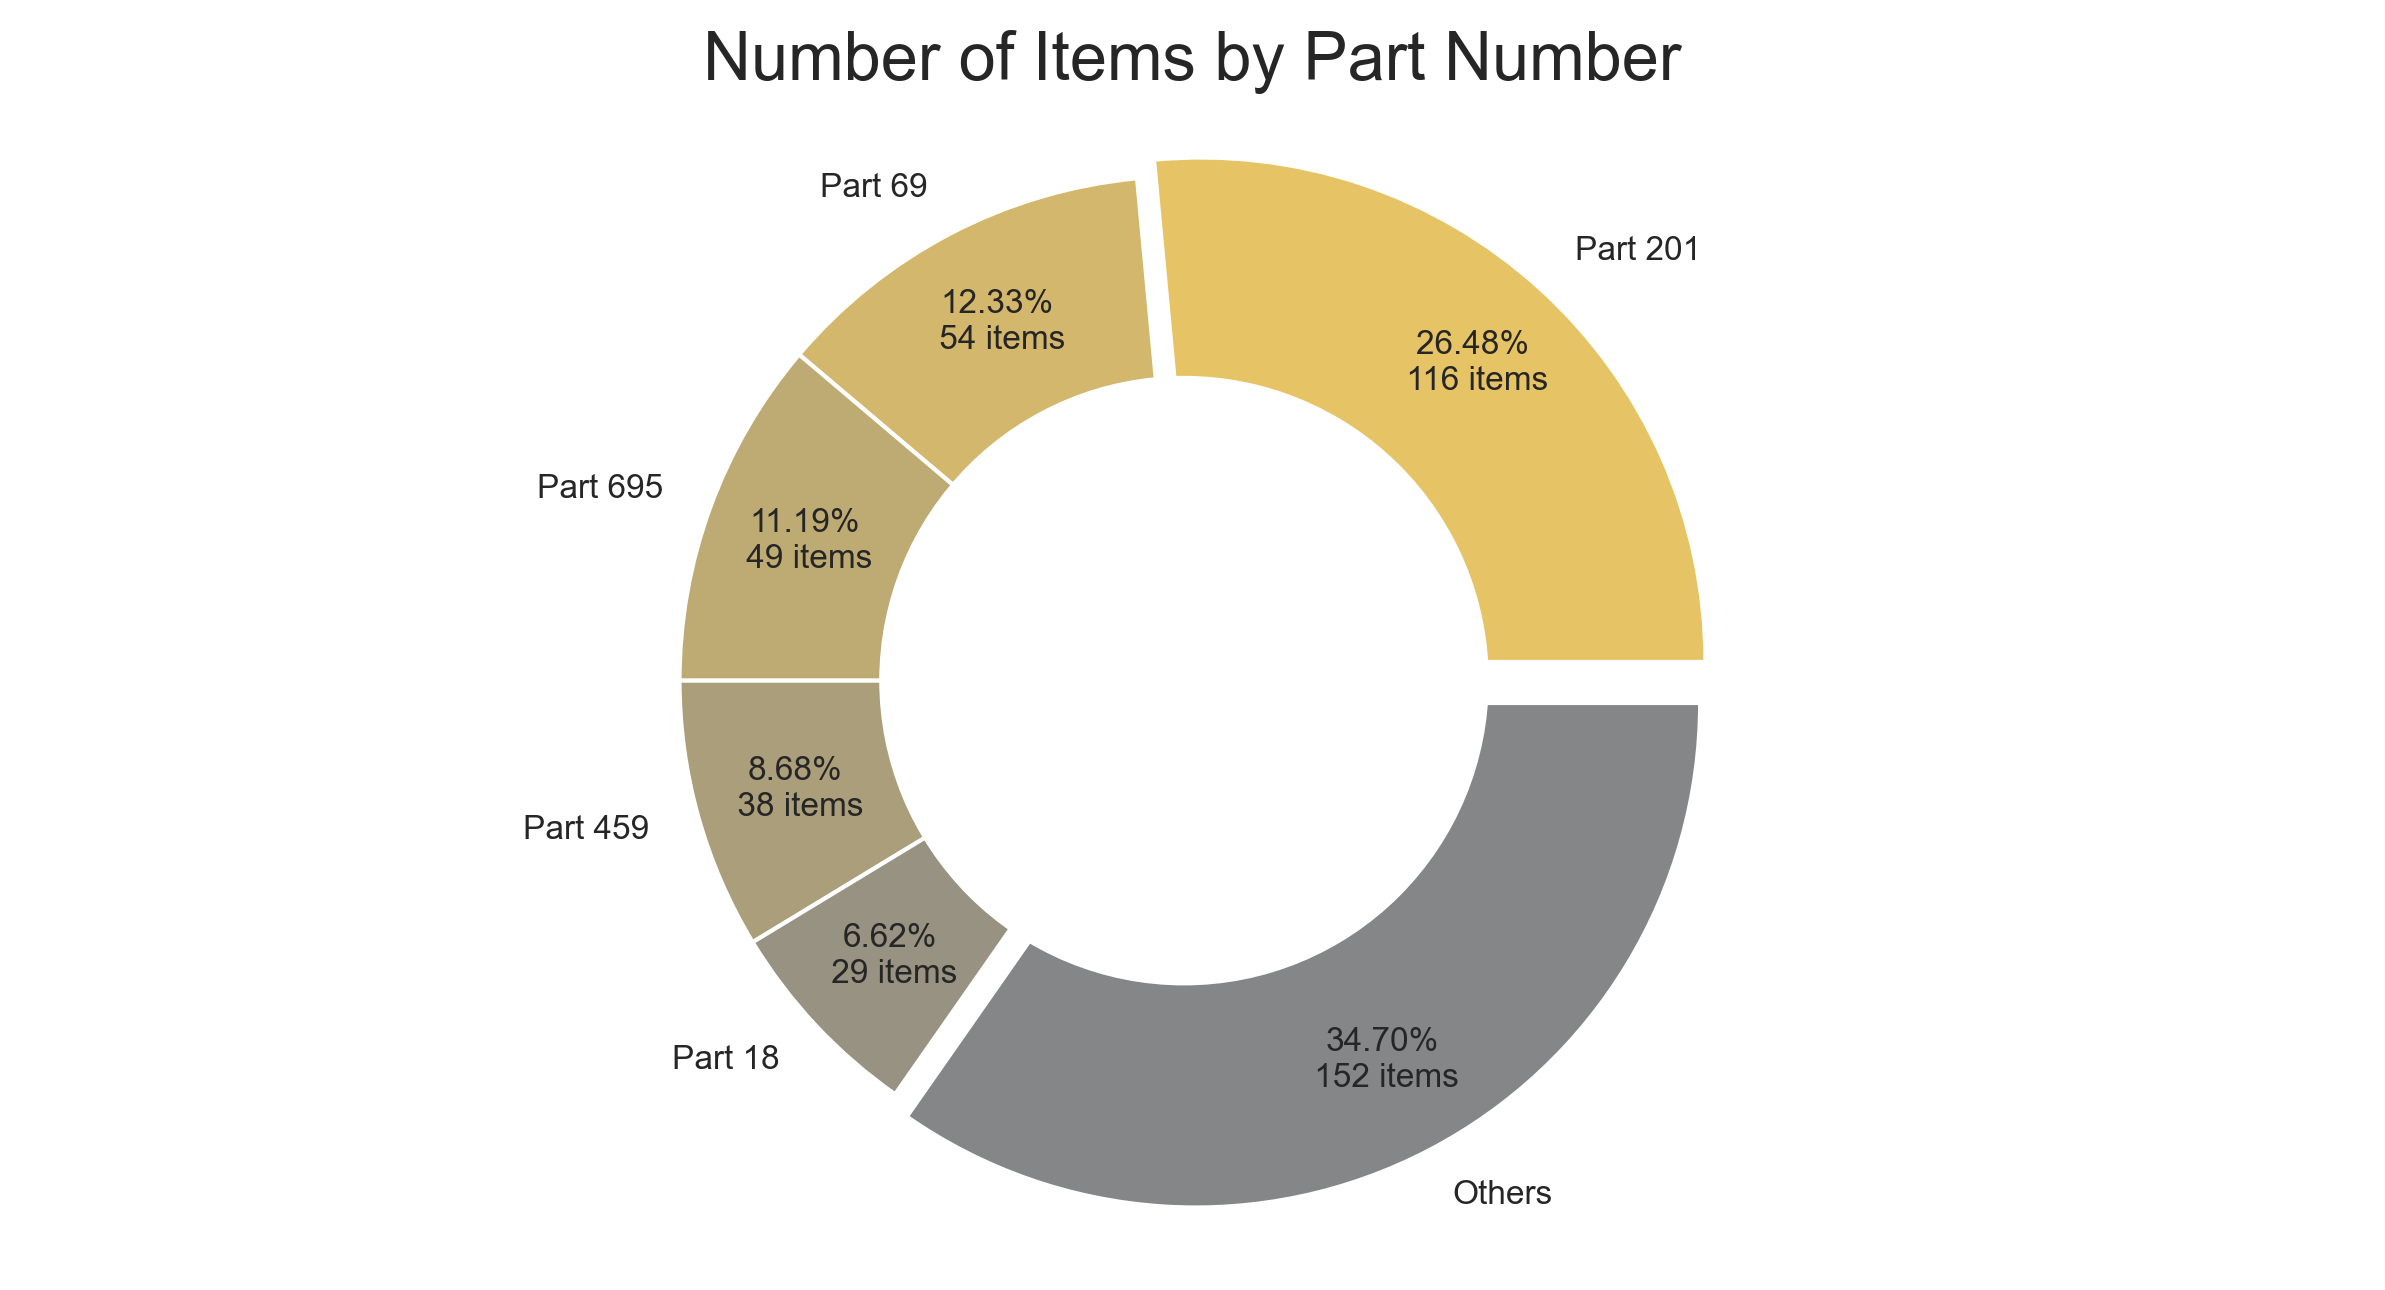

In [32]:
pie_df = df['PartNo'].value_counts(ascending=False)
top_n = 5
explode = [0.05, 0, 0, 0, 0, 0.05]
colorset = get_color_gradient(MTEC_YELLOW, MTEC_GREY, top_n + 1)

pie_df_as_df = pie_df.reset_index()
pie_df_as_df.columns = ['PartNo', 'Count']

top_categories = pie_df_as_df.head(top_n)
other_sum = pie_df_as_df.iloc[top_n:]['Count'].sum()
other_row = pd.DataFrame([['Others', other_sum]], columns=['PartNo', 'Count'])

simplified_pie_df = pd.concat([top_categories, other_row], ignore_index=True)
simplified_pie_df['PartNo'] = simplified_pie_df['PartNo'].astype(str)
simplified_pie_df['PartNoLabel'] = np.where(simplified_pie_df['PartNo'] != "Others", 'Part' + ' ' + simplified_pie_df['PartNo'], simplified_pie_df['PartNo']) 

wedges, labels, percentages = plt.pie(
									simplified_pie_df['Count'],
									colors=colorset,
									labels=simplified_pie_df['PartNoLabel'], 
									autopct=lambda p:f'{p:.2f}%\n {p*sum(simplified_pie_df['Count'])/100 :.0f} items', 
									textprops={'fontsize': 8}, 
									pctdistance=0.8, 
									explode=explode,
								)
# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title('Number of Items by Part Number', fontsize=16)
plt.axis('equal')
plt.savefig('Pie_chart.png', transparent=False)
plt.show()

In [34]:
pH_stats

min         2.71
max         4.11
mean    3.929452
Name: Ni pH, dtype: object

In [40]:
def plot_min_max_avg(plot_col, param_name, lim=None, unit=None, file_name=None, transparent=False):

	custom_palette = {
		'min': MTEC_GREY,
		'mean': '#b5a577',
		'max' : MTEC_YELLOW
	}
	temp_stat = stats_transpose.loc[plot_col]
	df_reset = temp_stat.reset_index().rename(columns={'index': param_name})
	df_melted = df_reset.melt(id_vars=param_name, var_name='Statistic', value_name='Value')

	# 3. Plot the data using seaborn.barplot
	plt.figure(figsize=(10, 6))
	sns.barplot(data=df_melted, 
				x=param_name, 
				y='Value', 
				hue='Statistic', 
				palette=custom_palette
			)

	plt.xlabel("")
	if lim is not None:
		plt.ylim(lim)
	if unit is not None:
		plt.ylabel(f"{param_name} ({unit})")
	else:
		plt.ylabel(param_name)
	plt.grid(axis='y', linestyle='--', alpha=0.7)
	plt.legend(title='Statistic')
	plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
	plt.title(f"Min/Max and average {param_name} of each baths")
	plt.tight_layout()
	if file_name is not None:
		plt.savefig(file_name, transparent=transparent)
	plt.show()


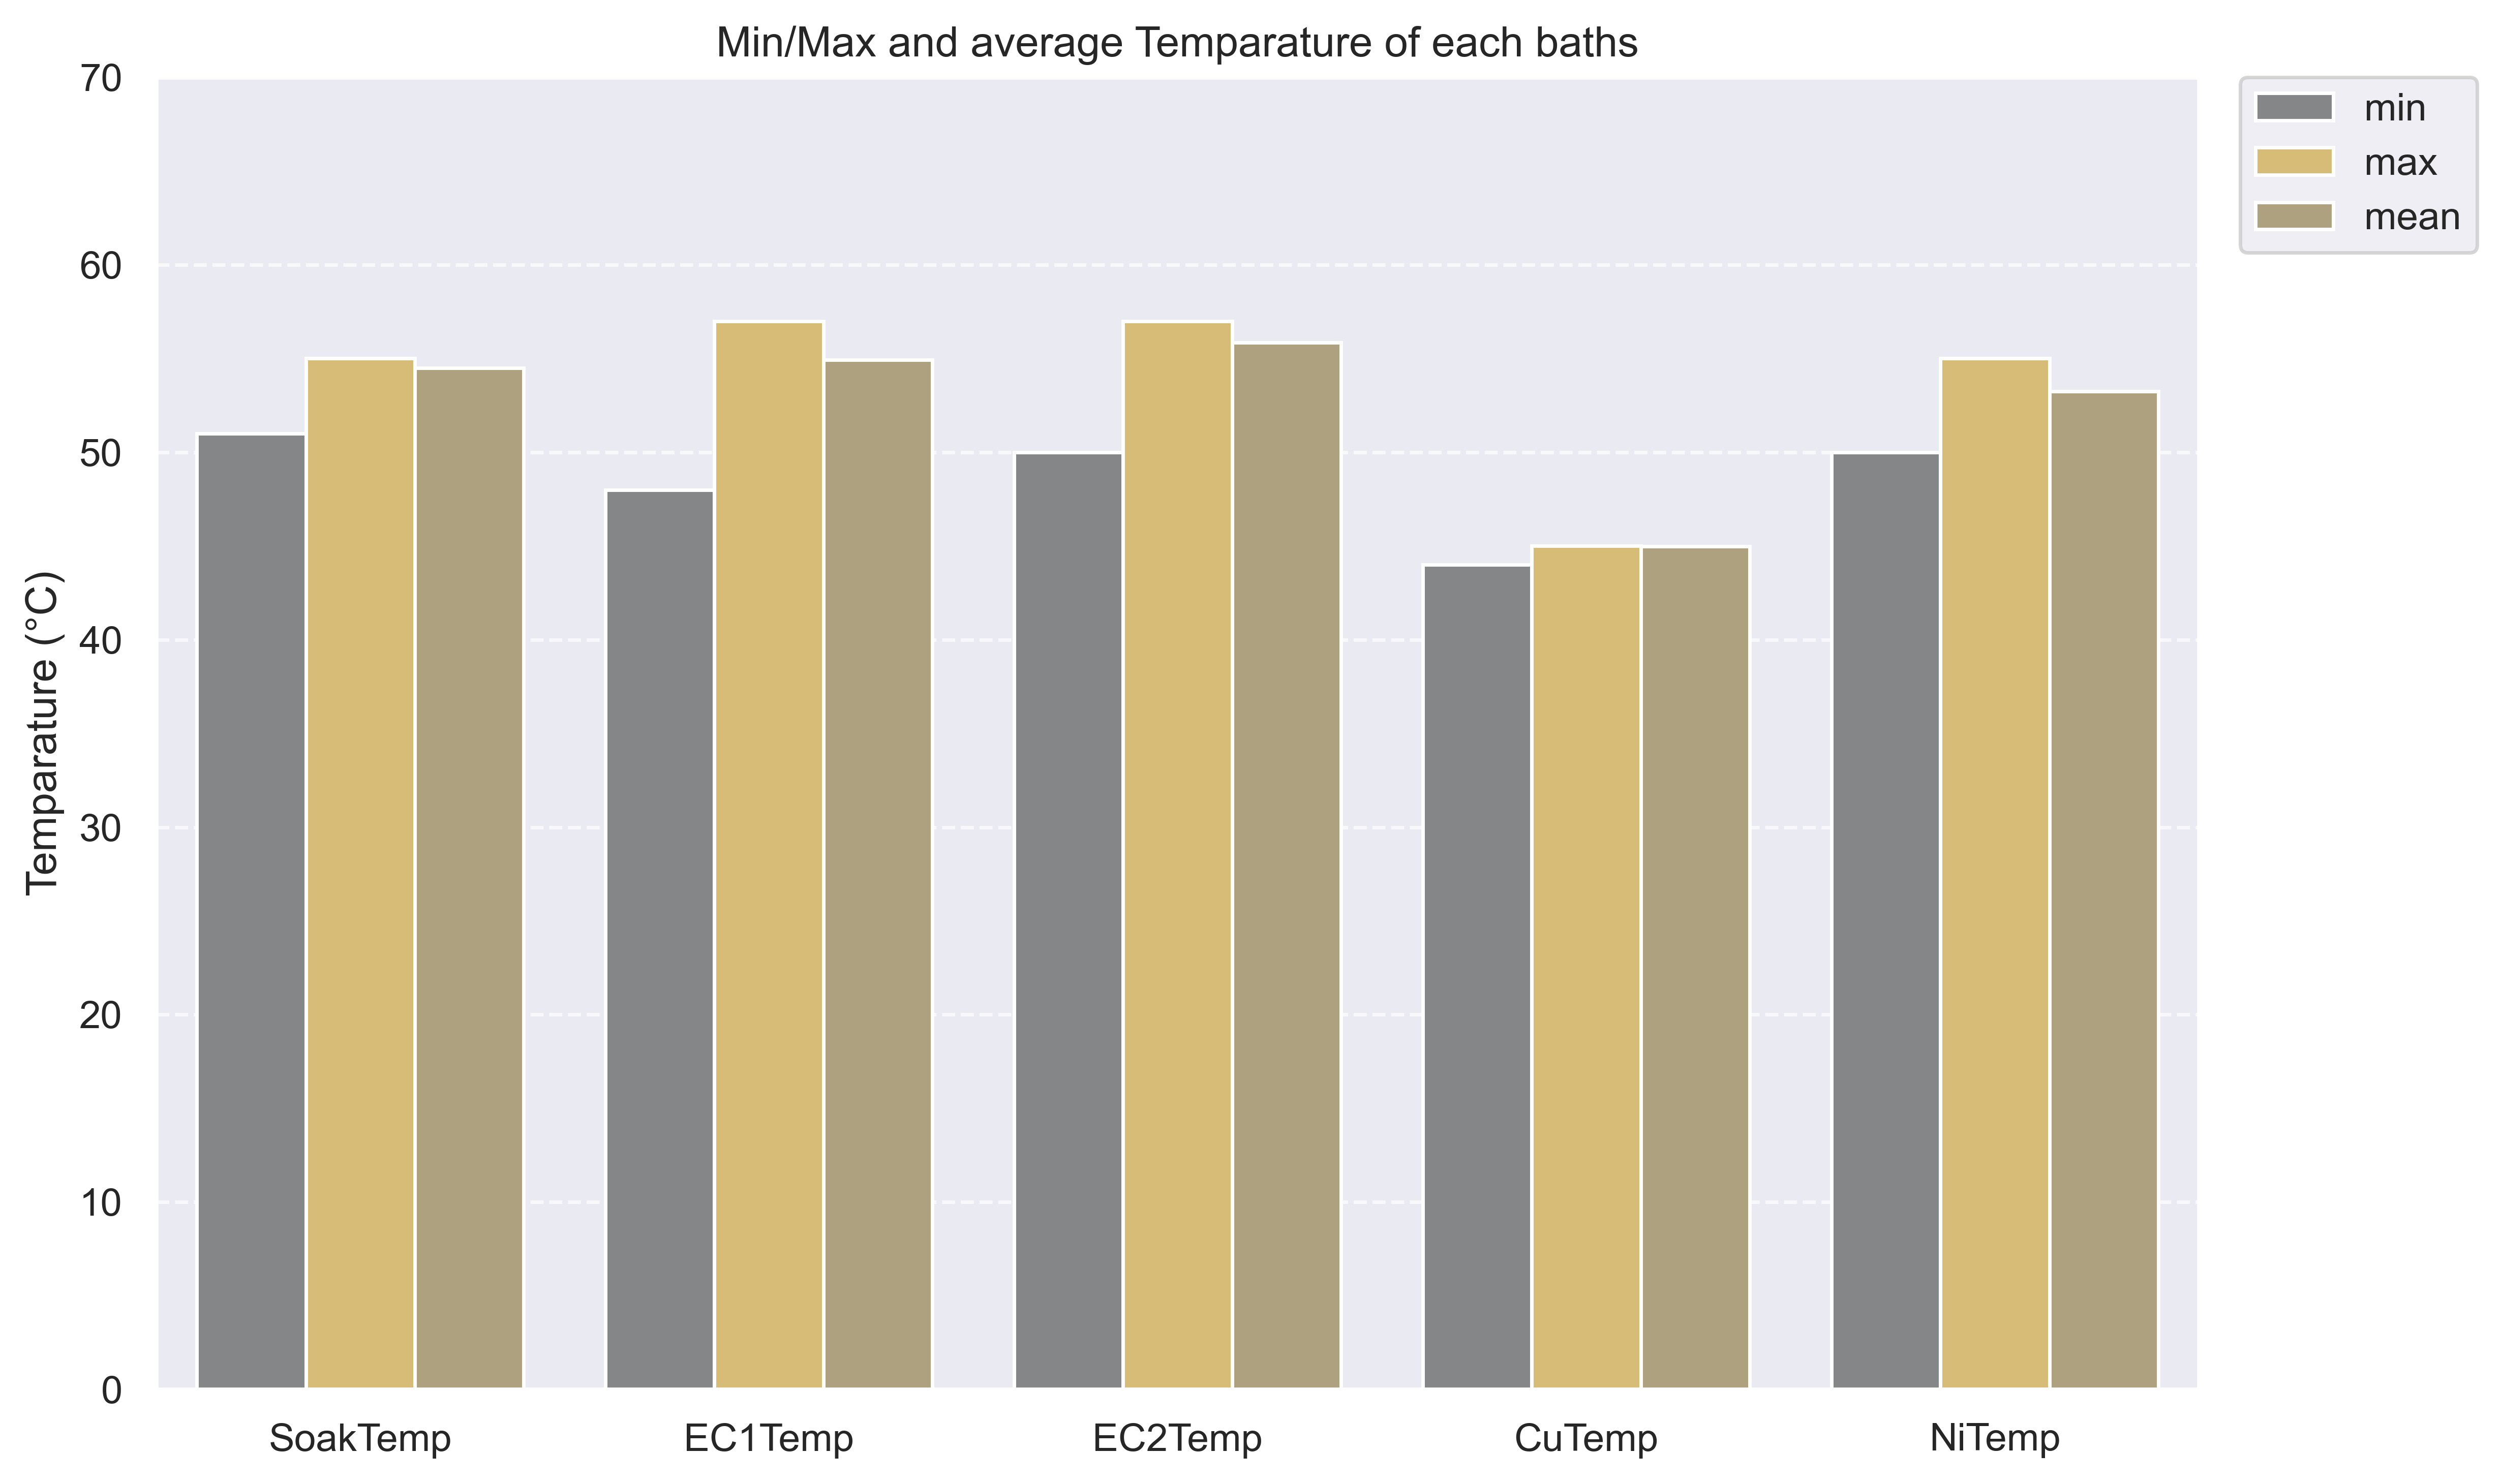

In [41]:
plot_min_max_avg(['SoakTemp', 'EC1Temp', 'EC2Temp', 'CuTemp', 'NiTemp'], 'Temparature', (0, 70), unit='°C', file_name='temp_stats.png')

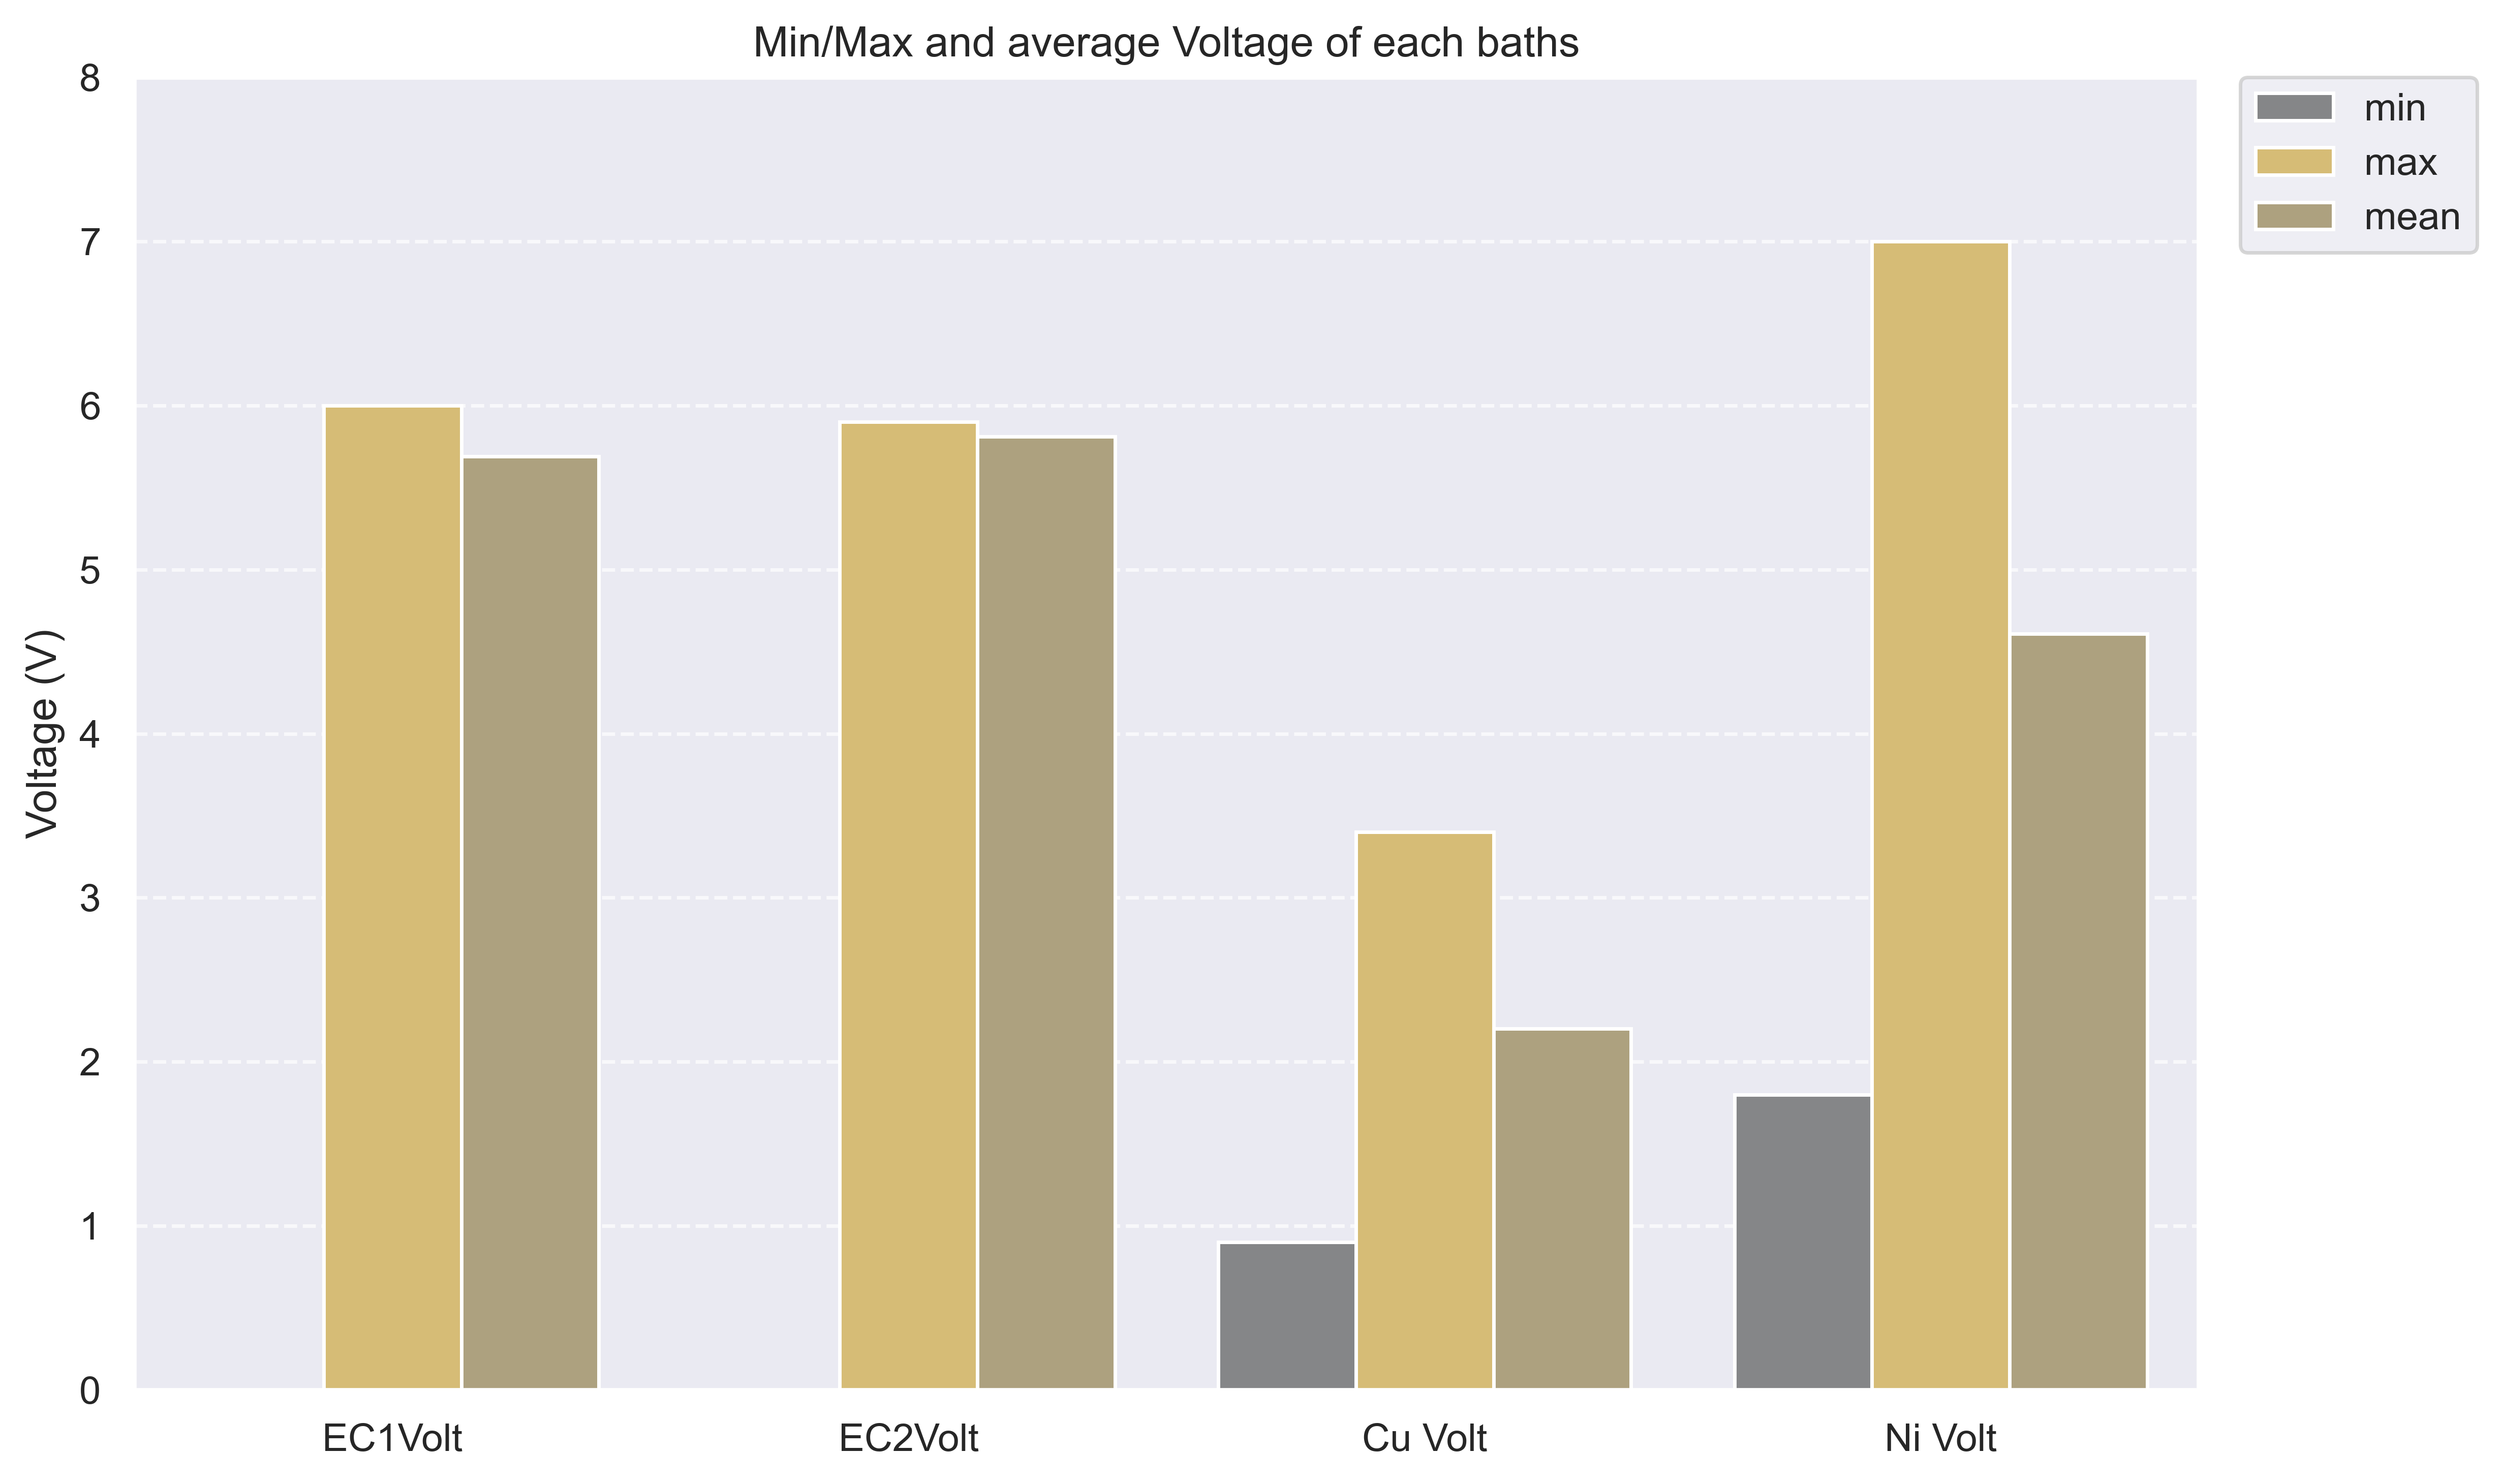

In [ ]:
plot_min_max_avg(['EC1Volt', 'EC2Volt', 'Cu Volt', 'Ni Volt'], 'Voltage', (0, 8), unit='V', file_name='voltage_stat.png')

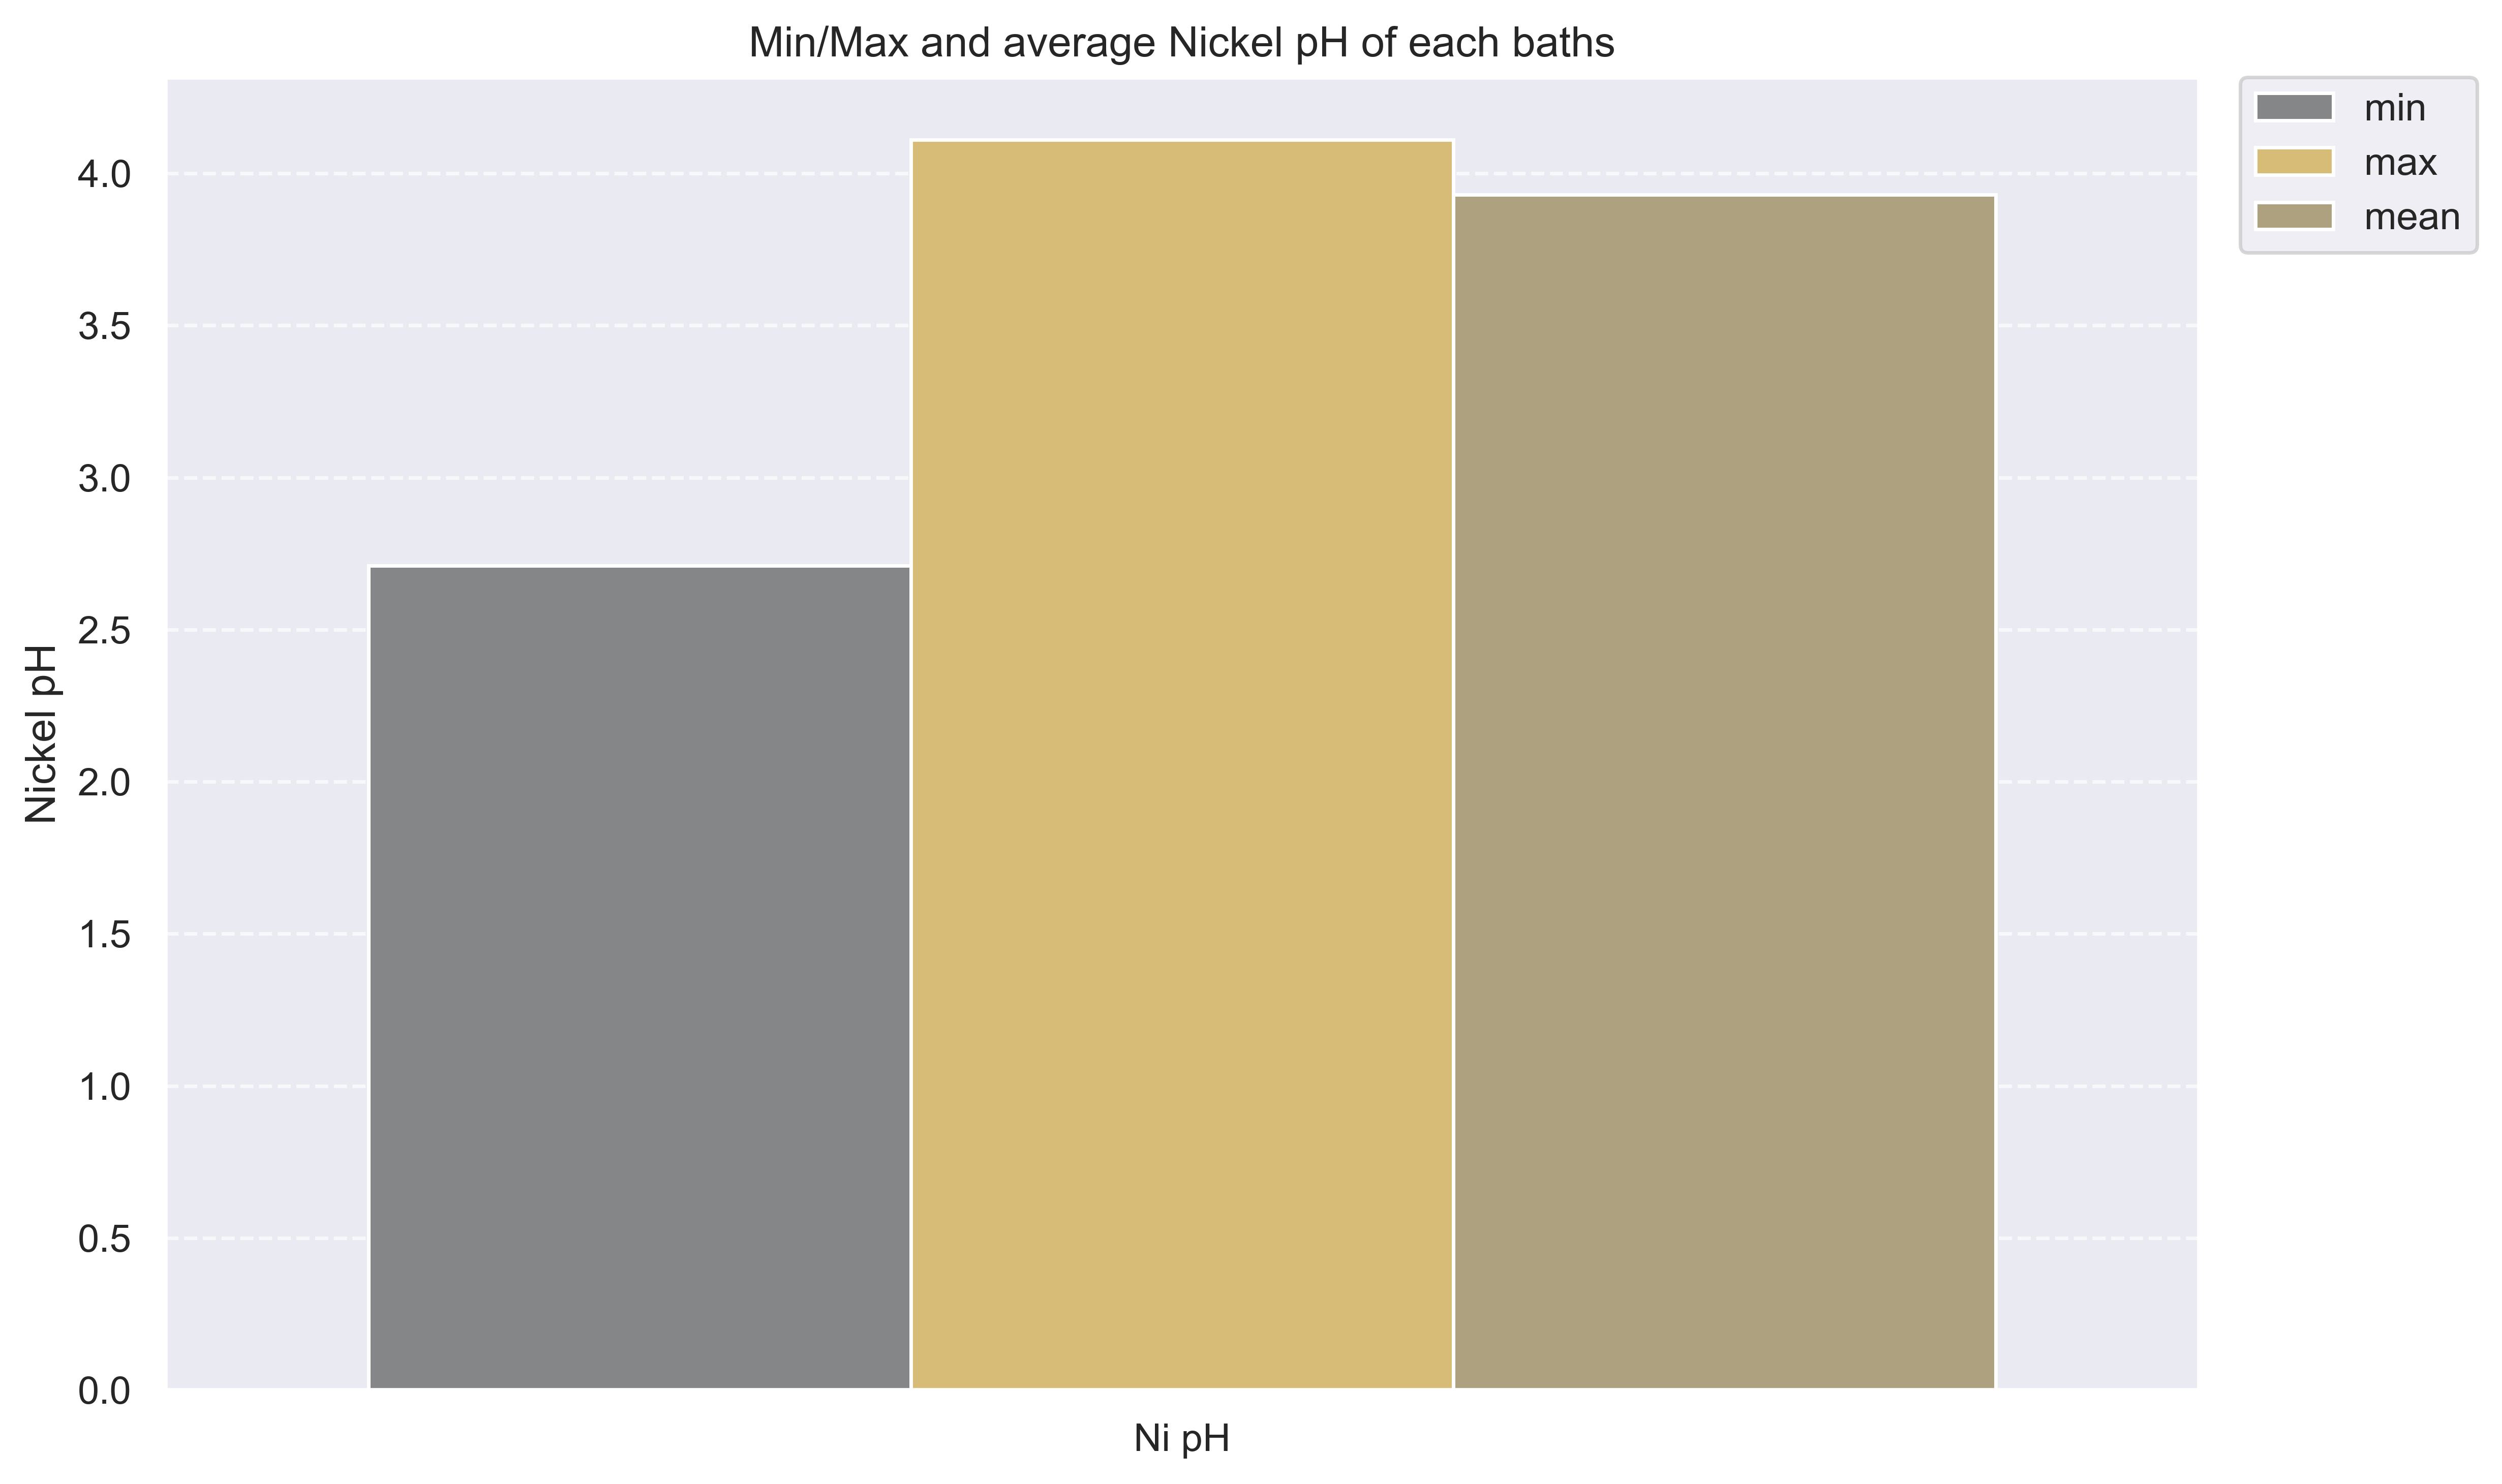

In [43]:
plot_min_max_avg(['Ni pH'], 'Nickel pH', file_name='pH_stat.png')

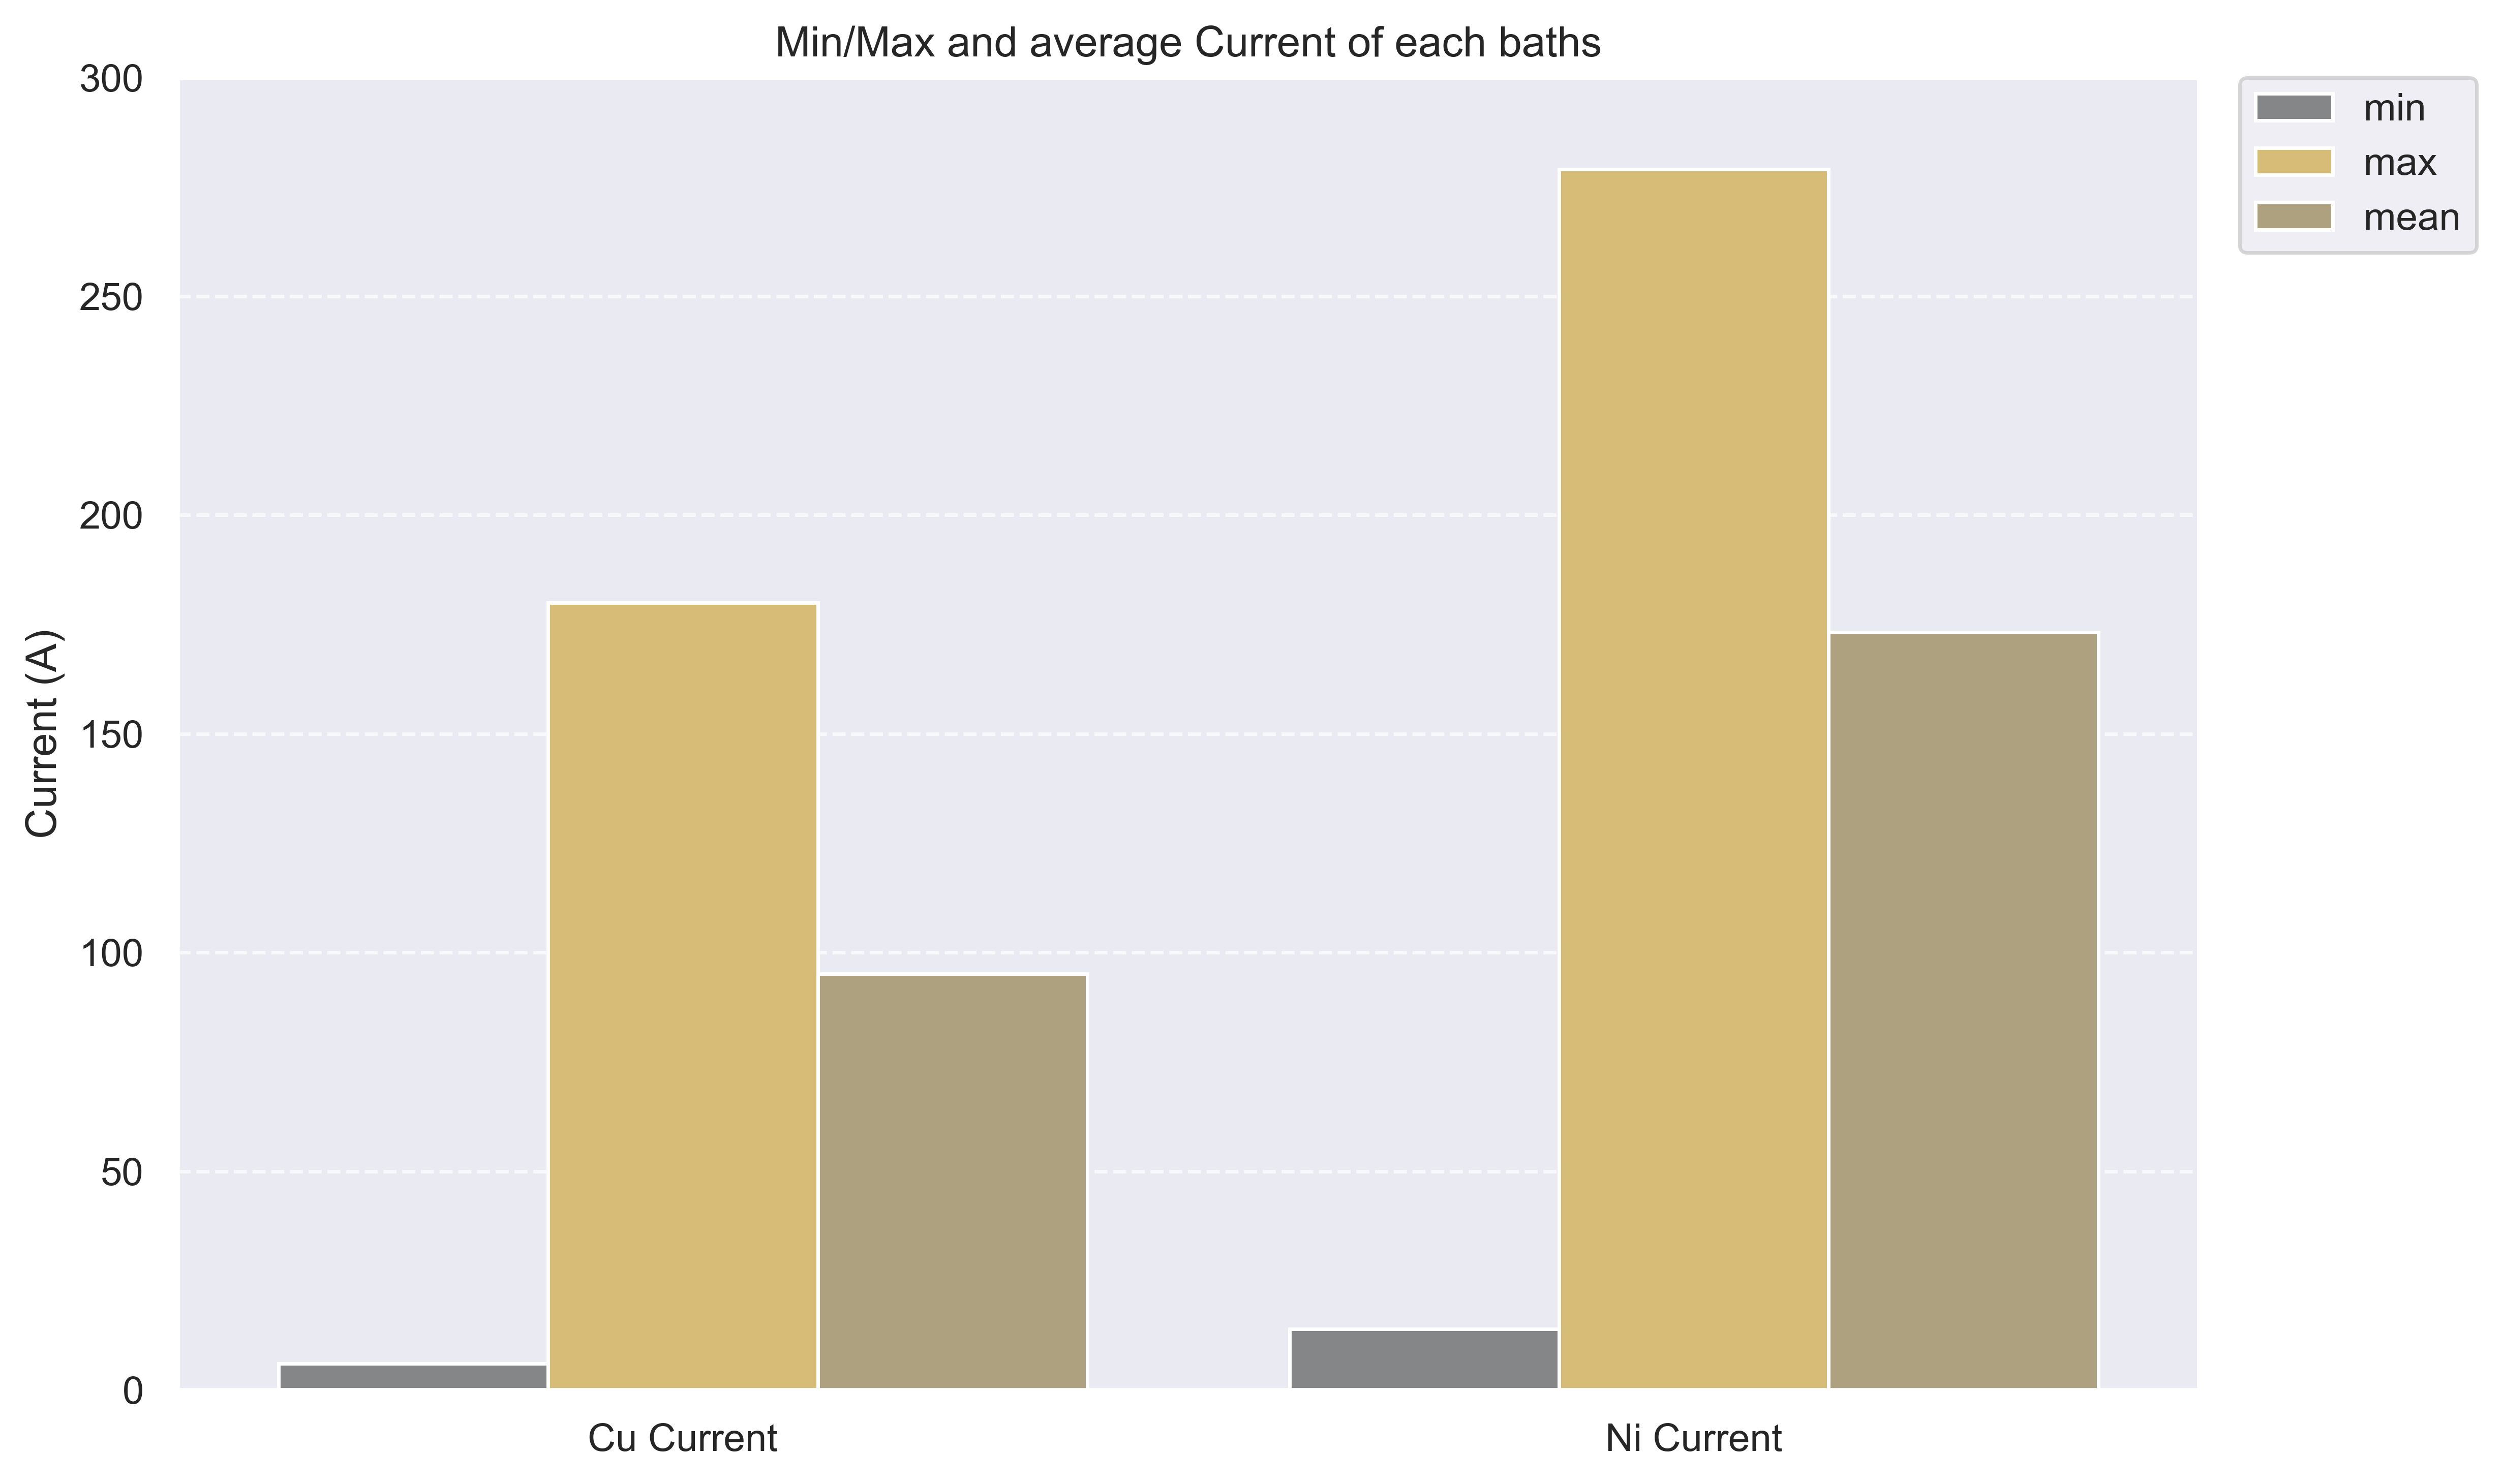

In [44]:
plot_min_max_avg(['Cu Current', 'Ni Current'], 'Current', (0, 300), unit='A', file_name='current_stat.png')

In [ ]:
stats_transpose

min  \
LocalTimeCol            2025-07-25 10:52:19.110000   
LotNo                                          1.0   
PartNo                                        11.0   
PartQty                                       12.0   
LoadTime                                     831.0   
SoakDip(min)                                -225.0   
EC1Volt                                        0.0   
EC1Dip(min)                                   16.0   
EC2Volt                                        0.0   
EC2Dip(min)                                   18.0   
CuDip(min)                                    16.0   
Cu Current                                     6.0   
Cu Volt                                        0.9   
NiDip(min)                                    24.0   
Ni Current                                    14.0   
Ni Volt                                        1.8   
Ni pH                                         2.71   
UnloadTime                                  1042.0   
SoakTemp                                      51.0   
EC1Temp                                       48.0   
EC2Temp                                       50.0   
CuTemp                                        44.0   
NiTemp                                        50.0   
Cu Current_per_PartQty                       0.125   
Ni Current_per_PartQty                    0.282353   

                                               max  \
LocalTimeCol            2025-08-01 17:52:52.887000   
LotNo                                        140.0   
PartNo                                       983.0   
PartQty                                      279.0   
LoadTime                                    1831.0   
SoakDip(min)                                  35.0   
EC1Volt                                        6.0   
EC1Dip(min)                                   20.0   
EC2Volt                                        5.9   
EC2Dip(min)                                   21.0   
CuDip(min)                                    19.0   
Cu Current                                   180.0   
Cu Volt                                        3.4   
NiDip(min)                                    36.0   
Ni Current                                   279.0   
Ni Volt                                        7.0   
Ni pH                                         4.11   
UnloadTime                                  1839.0   
SoakTemp                                      55.0   
EC1Temp                                       57.0   
EC2Temp                                       57.0   
CuTemp                                        45.0   
NiTemp                                        55.0   
Cu Current_per_PartQty                         2.4   
Ni Current_per_PartQty                         5.2   

                                                 mean  
LocalTimeCol            2025-07-29 11:09:54.835189504  
LotNo                                       48.438356  
PartNo                                     297.965753  
PartQty                                    158.454338  
LoadTime                                  1172.292237  
SoakDip(min)                                30.659817  
EC1Volt                                      5.689269  
EC1Dip(min)                                 18.611872  
EC2Volt                                      5.810959  
EC2Dip(min)                                 20.059361  
CuDip(min)                                  18.157534  
Cu Current                                  95.180365  
Cu Volt                                      2.200913  
NiDip(min)                                  29.575342  
Ni Current                                 173.164384  
Ni Volt                                      4.609361  
Ni pH                                        3.929452  
UnloadTime                                1413.481735  
SoakTemp                                         54.5  
EC1Temp                                     54.920091  
EC2Temp                                     55.863014  
CuTem

In [ ]:
temp_time_stat = df[df['SoakDip(min)'] >= 0]
temp_time_stat = temp_time_stat.describe().loc[['min', 'max', 'mean']]
time_transposer = temp_time_stat.transpose()

time_stat = time_transposer.loc[['SoakDip(min)', 'EC1Dip(min)', 'EC2Dip(min)', 'CuDip(min)', 'NiDip(min)']]
time_stat

min   max       mean
SoakDip(min)  29.0  35.0  33.013825
EC1Dip(min)   16.0  20.0  18.610599
EC2Dip(min)   18.0  21.0  20.059908
CuDip(min)    16.0  19.0  18.158986
NiDip(min)    24.0  36.0  29.571429

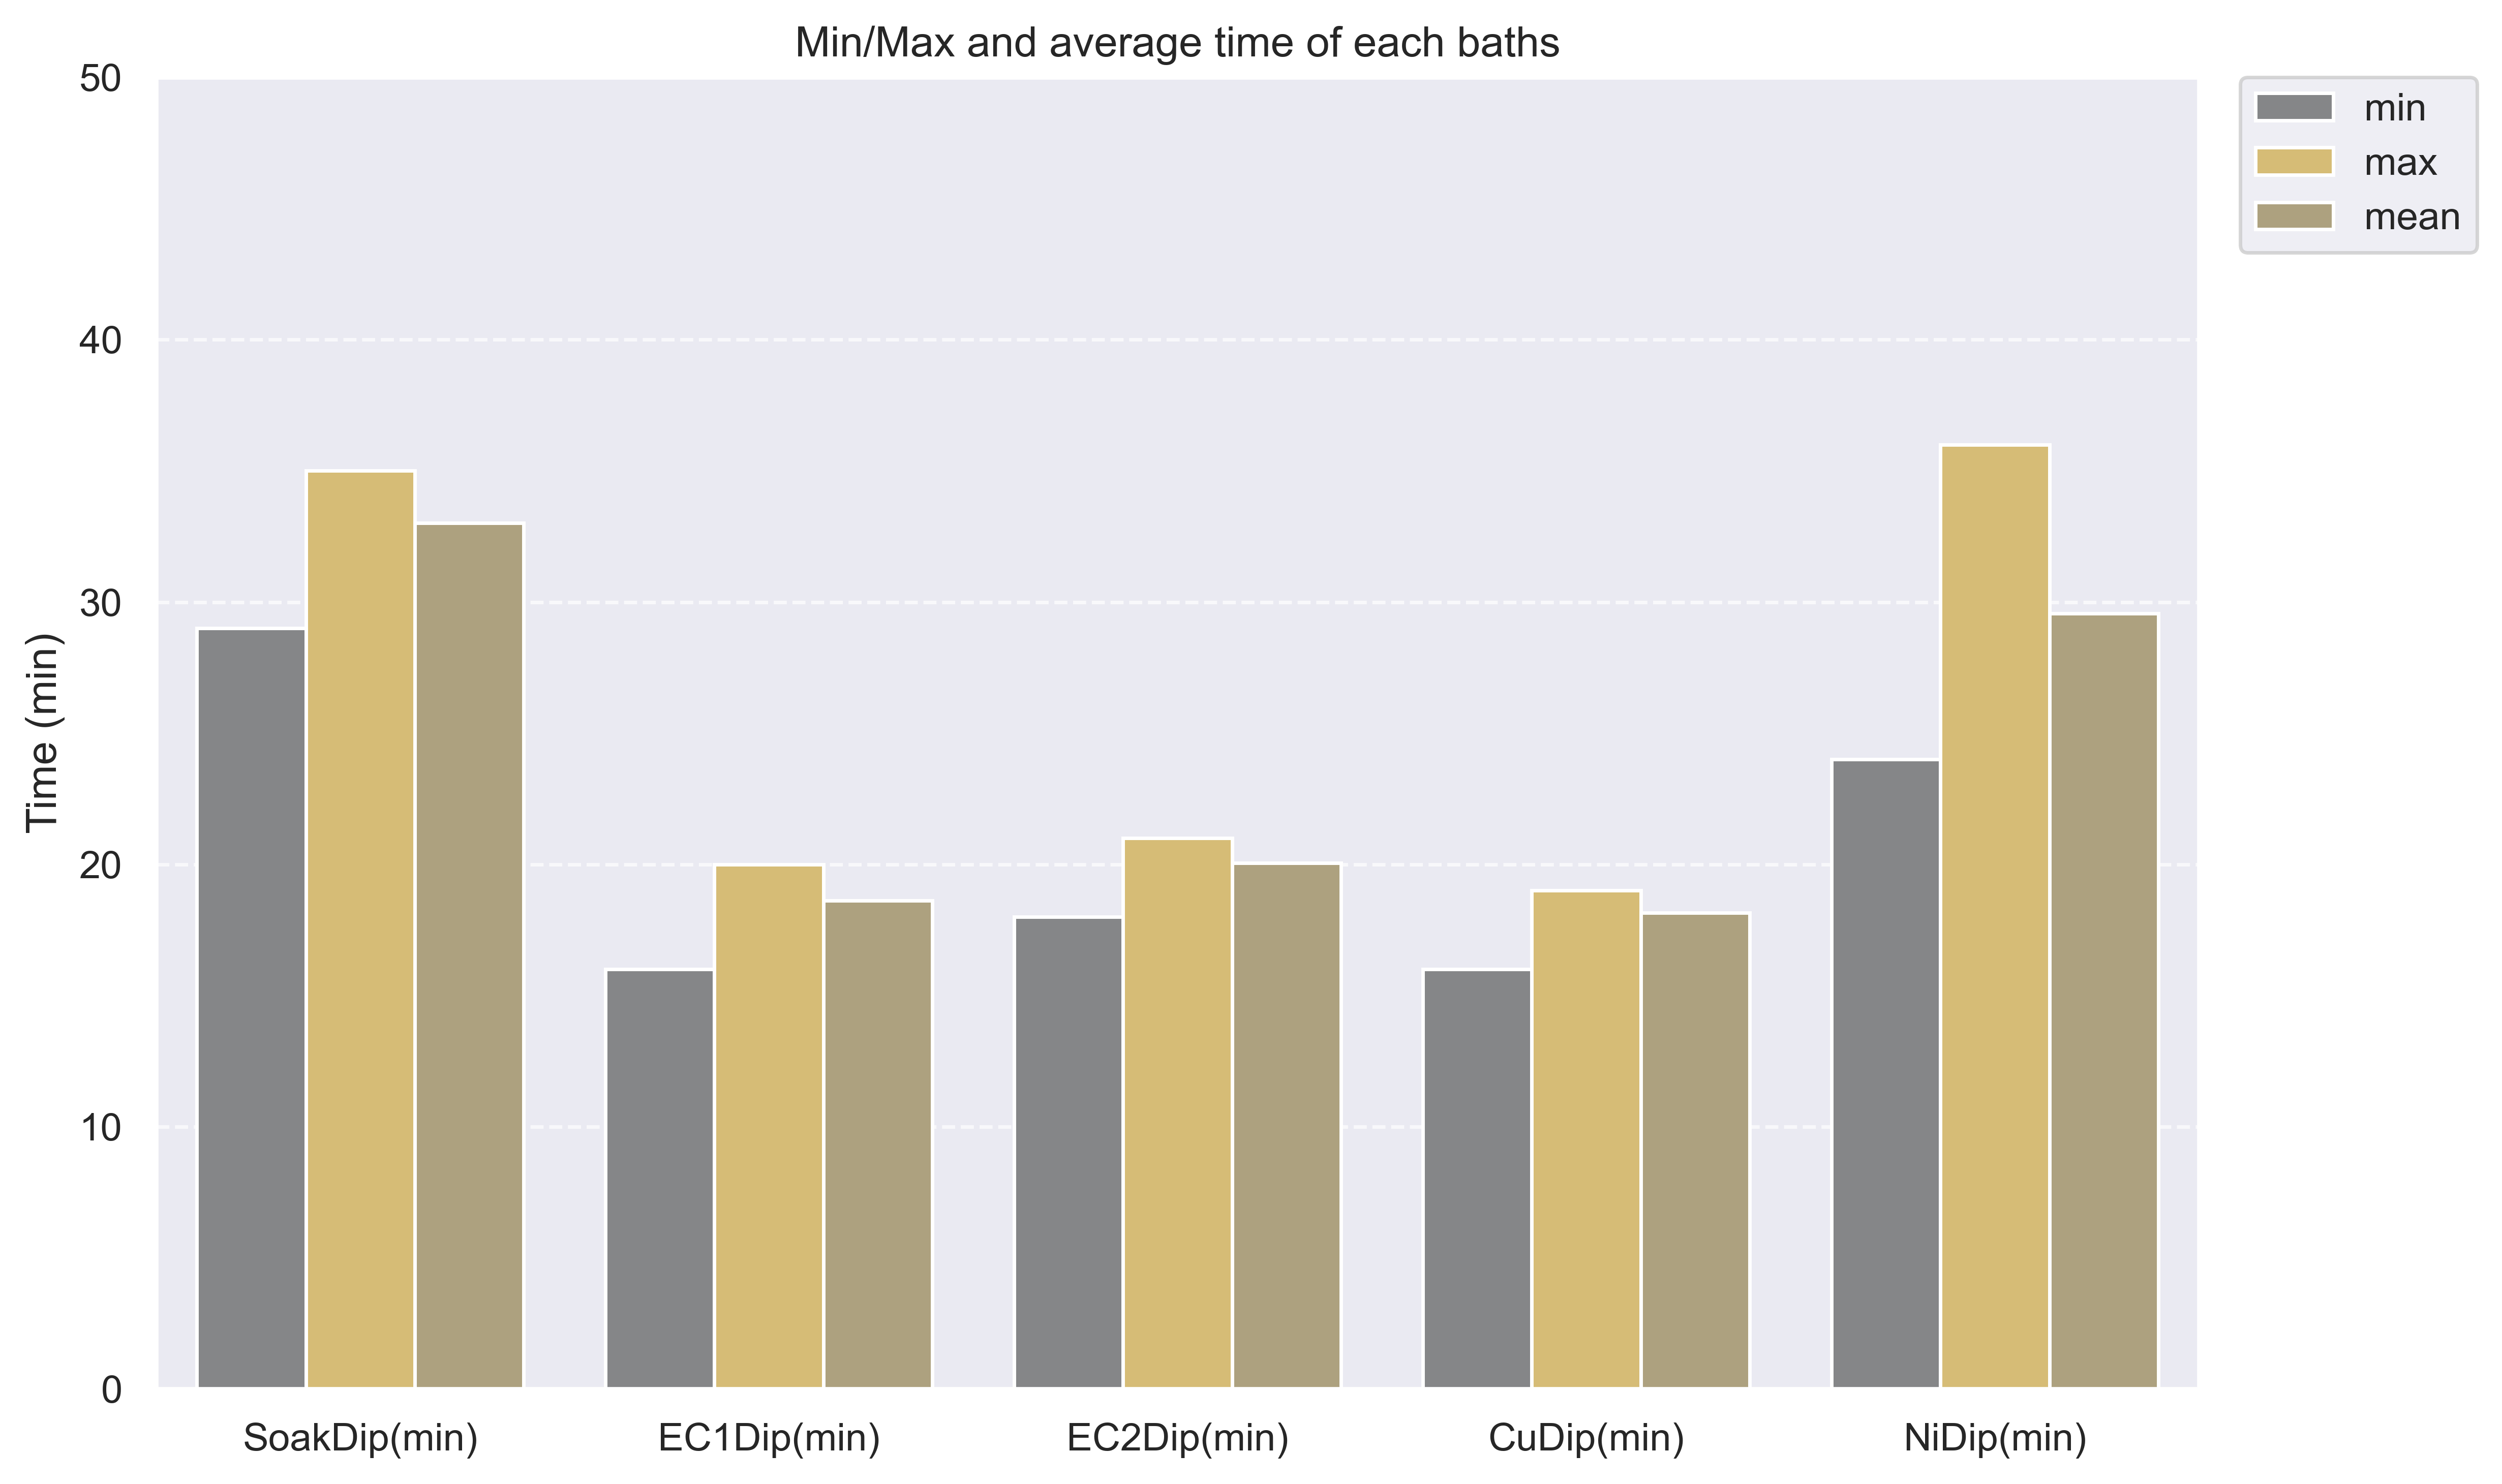

In [ ]:
# 2. Reshape the data for plotting using melt
# Reset the index to make 'Voltage' a column
df_reset = time_stat.reset_index().rename(columns={'index': 'Time'})

# Melt the DataFrame to a long format
df_melted = df_reset.melt(id_vars='Time', var_name='Statistic', value_name='Value')


custom_palette ={
	'min': MTEC_GREY,
	'mean': '#b5a577',
	'max' : MTEC_YELLOW
}

# 3. Plot the data using seaborn.barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, 
			x='Time', 
			y='Value', 
			hue='Statistic', 
			palette=custom_palette
		)

# 4. Customize the plot

plt.xlabel("")
plt.ylabel('Time (min)')
plt.ylim(0, 50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Statistic')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Min/Max and average time of each baths")
plt.tight_layout()
plt.savefig("time_stats.png", transparent=True)
plt.show()